# Supervised Learning - Foundations Project: ReCell 

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Log of normalized price of a new device of the same model in euros
- normalized_used_price: Log of normalized price of the used/refurbished device in euros

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [2]:
# read the dataset used_device_data.csv
data = pd.read_csv("used_device_data.csv")

<IPython.core.display.Javascript object>

In [3]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

<IPython.core.display.Javascript object>

## Data Overview

In [4]:
# returns the first 5 rows
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


<IPython.core.display.Javascript object>

In [5]:
# returns 10 random rows
np.random.seed(1)
df.sample(n=10)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
866,Others,Android,15.24,no,no,8.00,2.0,16.0,4.00,3000.0,206.0,2014,632,4.038832,5.190788
957,Celkon,Android,10.16,no,no,3.15,0.3,512.0,0.25,1400.0,140.0,2013,637,2.800325,3.884652
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.00,5000.0,185.0,2020,329,4.370713,4.487287
2150,Oppo,Android,12.83,yes,no,13.00,16.0,64.0,4.00,3200.0,148.0,2017,648,4.677863,5.639422
93,LG,Android,15.29,yes,no,13.00,5.0,32.0,3.00,3500.0,179.0,2019,216,4.517650,5.300415
1040,Gionee,Android,12.83,yes,no,13.00,8.0,32.0,4.00,3150.0,166.0,2016,970,4.645640,5.634325
3170,ZTE,Others,10.16,no,no,3.15,5.0,16.0,4.00,1400.0,125.0,2014,1007,3.764451,4.244344
2742,Sony,Android,12.70,yes,no,20.70,2.0,16.0,4.00,3000.0,170.0,2013,1060,4.422809,5.799820
102,Meizu,Android,15.29,yes,no,NaN,20.0,128.0,6.00,3600.0,165.0,2019,332,4.959412,6.040659
1195,HTC,Android,10.29,no,no,8.00,2.0,32.0,4.00,2000.0,146.0,2015,892,4.227855,4.879007


<IPython.core.display.Javascript object>

In [6]:
# returns the last 5 rows
df.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


<IPython.core.display.Javascript object>

### Observations
* The DataFrame has 15 columns and looks consistent with the description provided in the Data Dictionary.
* It is apparent that main_camera_mp is missing some values, this will be addressed later.

In [7]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

There are 3454 rows and 15 columns.


<IPython.core.display.Javascript object>

In [8]:
# checking for duplicate values in the data
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There are no duplicate values in the data.

In [9]:
# print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<IPython.core.display.Javascript object>


### Observations:
   * There are 11 numeric (float and int type) columns.
   * There are 4 string (object type) columns.
   * There are 3454 non-null values in 9 of the 15 columns.
   * There are 6 columns that contain some null values.
   * The memory usage is 404.9+ KB.

In [10]:
# convert the object data types brand_name, os, 4g, and 5g to categorical data.
df.brand_name = df.brand_name.astype("category")
df.os = df.os.astype("category")
df["4g"] = df["4g"].astype("category")
df["5g"] = df["5g"].astype("category")

# print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   brand_name             3454 non-null   category
 1   os                     3454 non-null   category
 2   screen_size            3454 non-null   float64 
 3   4g                     3454 non-null   category
 4   5g                     3454 non-null   category
 5   main_camera_mp         3275 non-null   float64 
 6   selfie_camera_mp       3452 non-null   float64 
 7   int_memory             3450 non-null   float64 
 8   ram                    3450 non-null   float64 
 9   battery                3448 non-null   float64 
 10  weight                 3447 non-null   float64 
 11  release_year           3454 non-null   int64   
 12  days_used              3454 non-null   int64   
 13  normalized_used_price  3454 non-null   float64 
 14  normalized_new_price   3454 non-null   f

<IPython.core.display.Javascript object>

### Observations:
   * There are 11 numeric columns.
   * There are 4 categorical columns.
   * The memory usage has been changed from 404.9+ KB to 312.2+ KB.

In [11]:
# statistical summary of numeric columns
df.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


<IPython.core.display.Javascript object>

In [12]:
# statistical summary of categorical columns
df.describe(include="category").T

,count,unique,top,freq
brand_name,3454,34,Others,502
os,3454,4,Android,3214
4g,3454,2,yes,2335
5g,3454,2,no,3302


<IPython.core.display.Javascript object>

**Observations**

- There are 34 unique brand names in the dataset.
- There are 4 unique operating systems.
- The most popular os in the dataset is Android.
- The mean screen size is 13.7 cm. The minimum is 5.1 cm and the maximum is 30.7 cm.
- The mean log normalized used price is 4.36.
- The mean log normalized new price is 5.23.
- The 1st quartile, median, and 3rd quartile values for ram of the devices is 4.0 GB.
- The *4g* column has 2 unique values - "*yes*" and "*no*"
- The *5g* column has 2 unique values - "*yes*" and "*no*"

In [13]:
# checking missing values
df.isna().sum().sort_values(ascending=False)

main_camera_mp           179
weight                     7
battery                    6
int_memory                 4
ram                        4
selfie_camera_mp           2
brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

#### Observations
* The main_camera_mp column is missing 179 values.
* The weight column is missing 7 values.
* The battery column is missing 6 values.
* The in_memory and ram columns are each missing 4 values.
* The selfie_camera_mo column is missing 2 values.
* The remaining 9 columns aren't missing any values.

## Exploratory Data Analysis (EDA)

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

## Univariate Analysis
### Univariate Numerical

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Observations on screen size

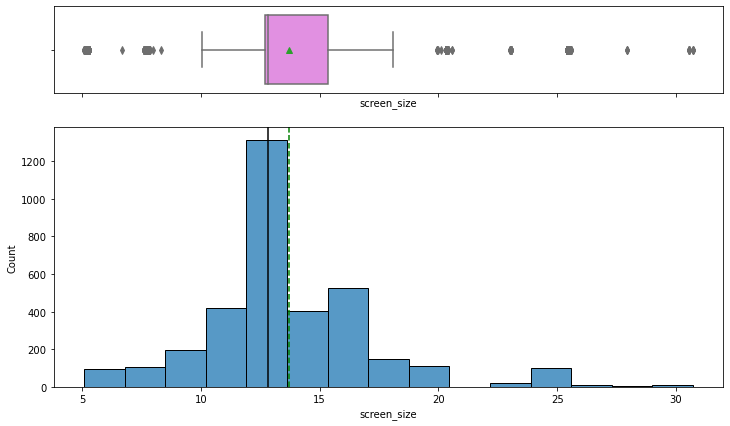

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(df, "screen_size", bins=15)

In [16]:
print(
    f"The mean screen size is {round(df.screen_size.mean(),1)} cm and the median screen size is {round(df.screen_size.median(),1)} cm."
)

The mean screen size is 13.7 cm and the median screen size is 12.8 cm.


<IPython.core.display.Javascript object>

#### Observations
* The screen size distribution is right skewed.
* The mean screen size is 13.7 cm and the median screen size is 12.8 cm.
* Screen size values range from about 5 cm to a little over 30 cm.
* The screen size data contains several outliers.

### Observations on main camera mp

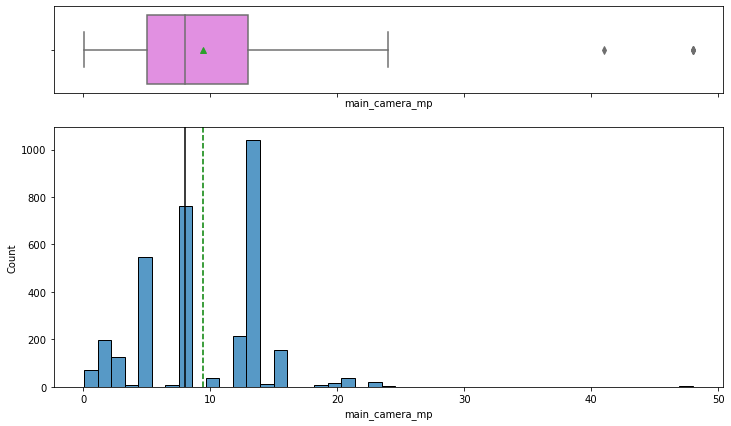

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(df, "main_camera_mp")

In [18]:
print(
    f"The mean main camera mp is {round(df.main_camera_mp.mean(),1)} megapixels and the median main camera mp is {round(df.main_camera_mp.median(),1)} megapixels."
)

The mean main camera mp is 9.5 megapixels and the median main camera mp is 8.0 megapixels.


<IPython.core.display.Javascript object>

#### Observations:
* The main camera mp data has some outliers between 40-50 megapixels.
* The distribution is right skewed and the mean is greater than the median.
* The median main camera mp is 8.0 megapixels and the mean is 9.46 megapixels.

### Observations on selfie camera mp

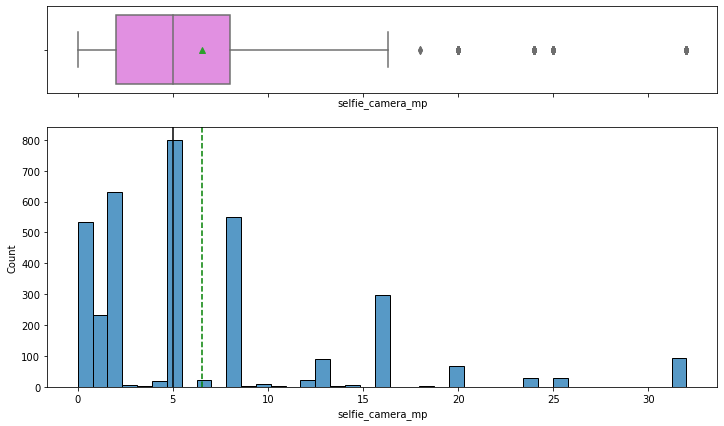

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(df, "selfie_camera_mp")

In [20]:
print(
    f"The mean selfie cam mp is {round(df.selfie_camera_mp.mean(),1)} megapixels and the median selfie cam mp is {round(df.selfie_camera_mp.median(),1)} megapixels."
)

The mean selfie cam mp is 6.6 megapixels and the median selfie cam mp is 5.0 megapixels.


<IPython.core.display.Javascript object>

#### Observations:
* The selfie camera mp data has several outliers above the upper whisker.
* The distribution is right skewed and the mean is greater than the median.
* The median main camera mp is 5.0 megapixels and the mean is 6.6 megapixels.

### Observations on internal memory

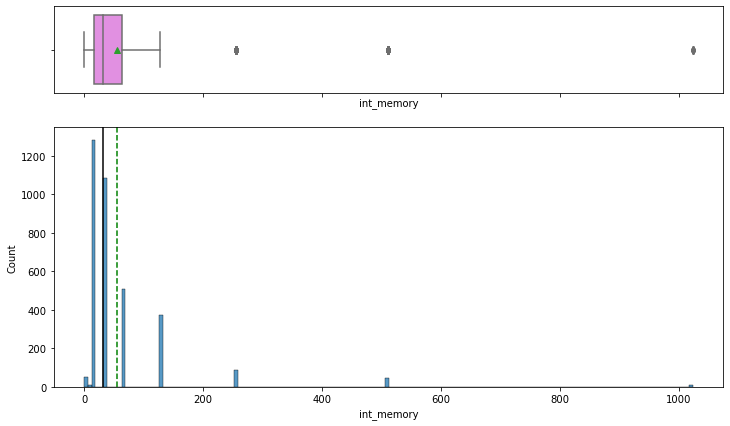

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(df, "int_memory")

In [22]:
print(
    f"The mean internal memory is {round(df.int_memory.mean(),1)} GB and the median internal memory is {round(df.int_memory.median(),1)} GB."
)

The mean internal memory is 54.6 GB and the median internal memory is 32.0 GB.


<IPython.core.display.Javascript object>

#### Observations:
* The internal memory data has outliers above the upper whisker.
* The distribution is right skewed and the mean is greater than the median.
* The internal memory median is 32 GB and the mean is 54.6 GB.

### Observations on ram

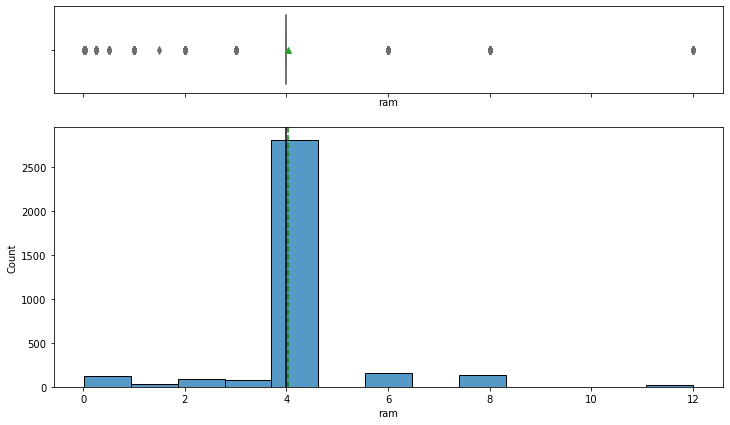

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(df, "ram")

In [24]:
print(
    f"The mean ram is {round(df.ram.mean(),1)} GB and the median ram is {round(df.ram.median(),1)} GB."
)

The mean ram is 4.0 GB and the median ram is 4.0 GB.


<IPython.core.display.Javascript object>

#### Observations:
* The 1st, 2nd, and 3rd quartile are all 4.0 GB.
* The mean is very close to the median of 4.0 GB.
* There are several outliers as any ram that is not 4.0 GB is an outlier.

### Observations on battery

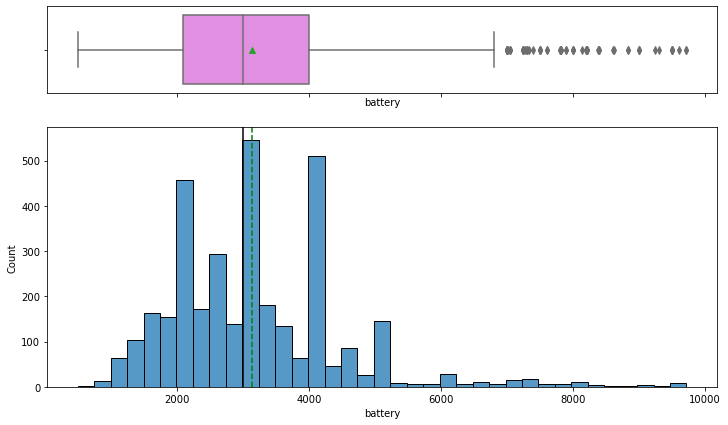

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(df, "battery")

In [26]:
print(
    f"The mean battery is {round(df.battery.mean(),1)} mAh and the median battery is {round(df.battery.median(),1)} mAh."
)

The mean battery is 3133.4 mAh and the median battery is 3000.0 mAh.


<IPython.core.display.Javascript object>

#### Observations:
* The battery distribution is right skewed.
* The median battery capacity is 3000 mAh and the mean is 3133 mAh. 
* There are several outliers above the upper whisker.

### Observations on weight

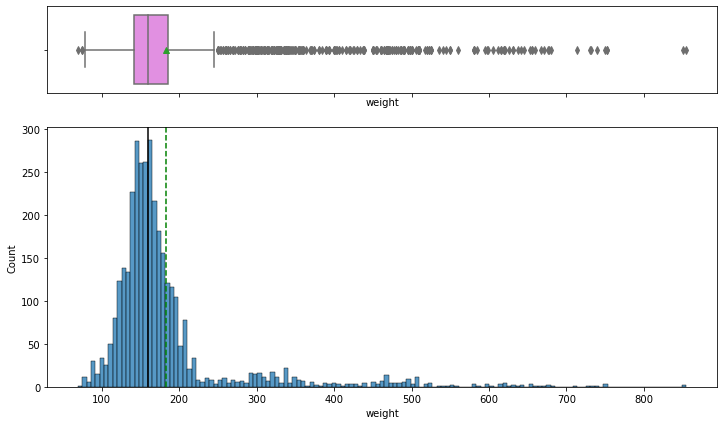

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(df, "weight")

In [28]:
print(
    f"The mean weight is {round(df.weight.mean(),1)} grams and the median weight is {round(df.weight.median(),1)} g."
)

The mean weight is 182.8 grams and the median weight is 160.0 g.


<IPython.core.display.Javascript object>

#### Observations:
* The weight distribution is right skewed.
* The median weight is 160.0 g and the mean is 182.8 g. 
* There are several outliers.

### Observations on release year

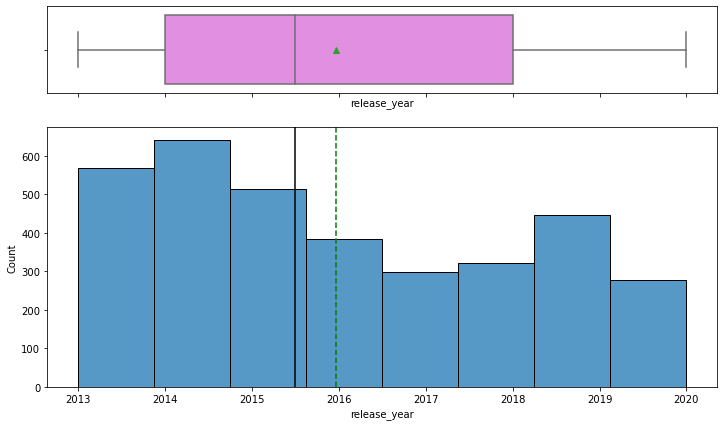

<IPython.core.display.Javascript object>

In [29]:
histogram_boxplot(df, "release_year", bins=8)

#### Observations:
* The release year distribution is right skewed.
* The release years in the dataset range from 2013 to 2020.
* There are no outliers.

### Observations on days used

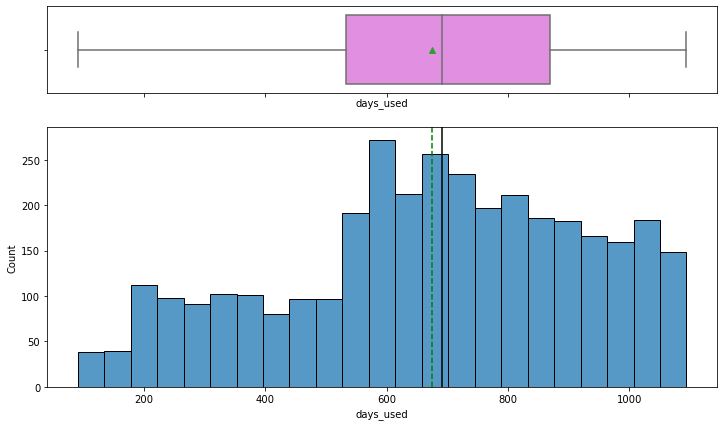

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(df, "days_used")

In [31]:
print(
    f"The mean days used is {round(df.days_used.mean(),1)} days and the median days used is {round(df.days_used.median(),1)} days."
)

The mean days used is 674.9 days and the median days used is 690.5 days.


<IPython.core.display.Javascript object>

#### Observations:
* The days used distribution is slightly left skewed.
* On average, the devices were used for a little under two years.
* There are no outliers.

### 1. What does the distribution of normalized used device prices look like?

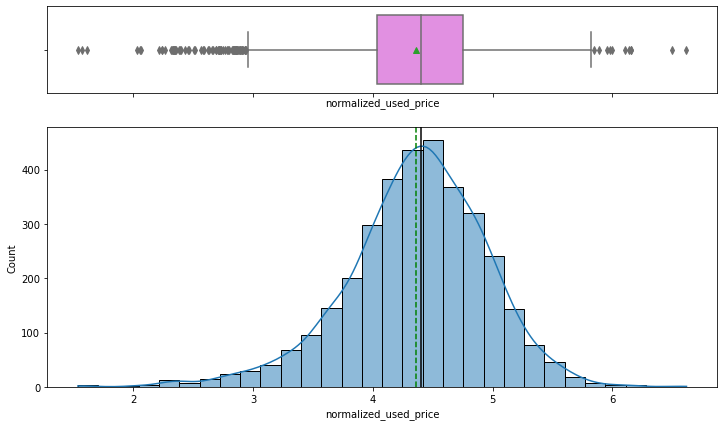

<IPython.core.display.Javascript object>

In [32]:
histogram_boxplot(df, "normalized_used_price", figsize=(12, 7), kde=True, bins=30)

In [33]:
print(
    f"The mean normalized used device price is {round(df.normalized_used_price.mean(),2)} euros and the median normalized used device price is {round(df.normalized_used_price.median(),2)} euros."
)


The mean normalized used device price is 4.36 euros and the median normalized used device price is 4.41 euros.


<IPython.core.display.Javascript object>

##### Observations:
* The mean and median used device prices are very similar, 4.36 and 4.41 euros respectively.
* The distribution is slightly left skewed.
* There are outliers on both sides of the distribution.

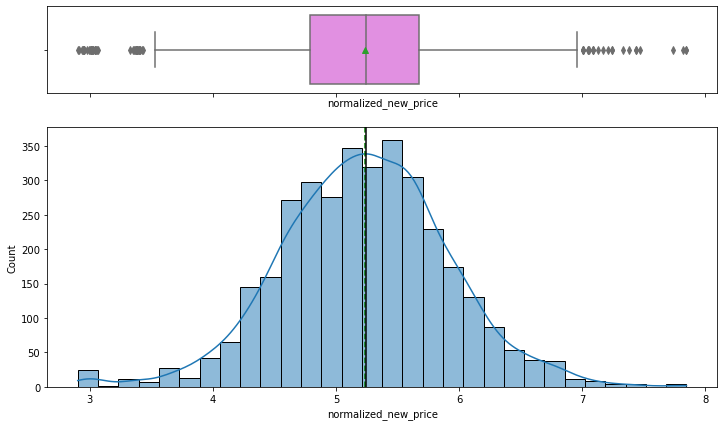

<IPython.core.display.Javascript object>

In [34]:
histogram_boxplot(df, "normalized_new_price", figsize=(12, 7), kde=True, bins=30)

In [35]:
print(
    f"The mean normalized new device price is {round(df.normalized_new_price.mean(),2)} euros and the median normalized new device price is {round(df.normalized_new_price.median(),2)} euros."
)

The mean normalized new device price is 5.23 euros and the median normalized new device price is 5.25 euros.


<IPython.core.display.Javascript object>

#### Observations on normalized used device price
* The mean and median new device prices are very similar, 5.23 and 5.25 euros respectively.
* The distribution is symmetric.
* There are outliers on both sides of the distribution.

### Univariate Categorical

In [36]:
# function to create labeled barplots


def labeled_barplot(data, feature, hue=None, order=None, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))
    plt.xticks(rotation=90, fontsize=15)
    if hue is None:
        ax = sns.countplot(
            data=data,
            x=feature,
            palette="Paired",
            order=data[feature].value_counts().index,
        )
    else:
        ax = sns.countplot(
            data=data,
            x=feature,
            hue=hue,
            palette="Paired",
            order=data[feature].value_counts().index,
        )
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))  # legend placement
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Observations on brand name

In [37]:
df.brand_name.nunique()

34

<IPython.core.display.Javascript object>

In [38]:
# Get top 5 brands with highest number of devices
top5 = df["brand_name"].value_counts()[:5].reset_index(name="counts")
top5.rename(columns={"index": "brand_name"}, inplace=True)
top5

,brand_name,counts
0,Others,502
1,Samsung,341
2,Huawei,251
3,LG,201
4,Lenovo,171


<IPython.core.display.Javascript object>

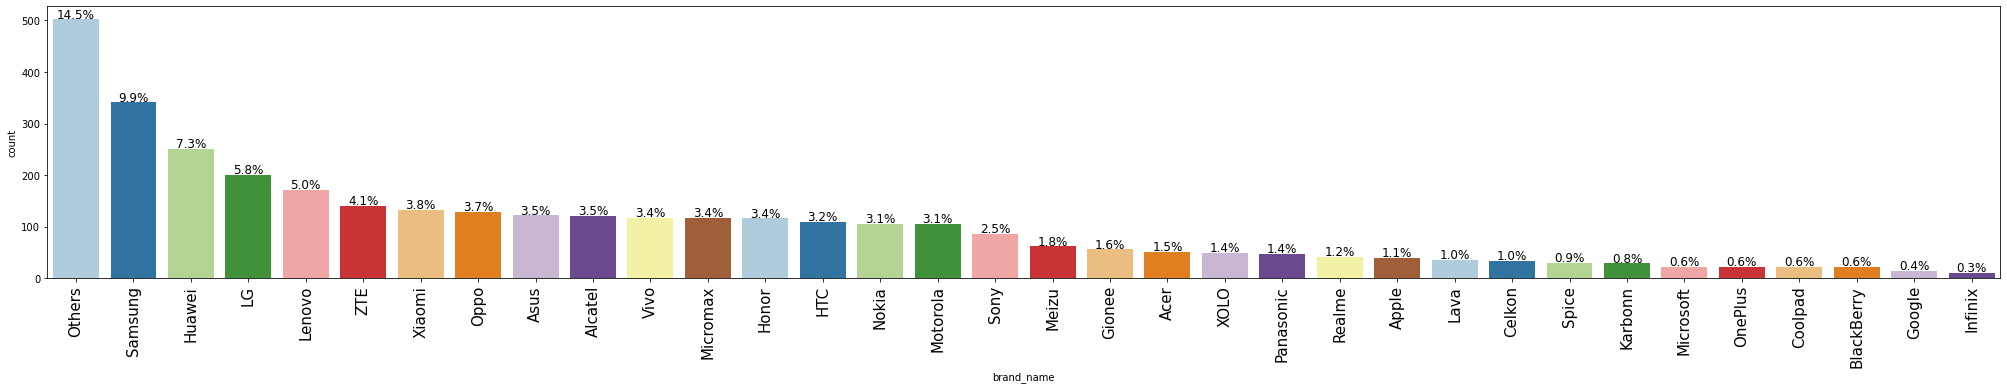

<IPython.core.display.Javascript object>

In [39]:
labeled_barplot(df, "brand_name", perc=True)

#### Observations
* There are 34 unique values for brand_name (33 identified brands and an 'Others' category).
* Of the identified brands, Samsung, Huawei, LG, and Lenovo have the most devices.

### Observations on os

#### 2. What percentage of the used device market is dominated by Android devices?

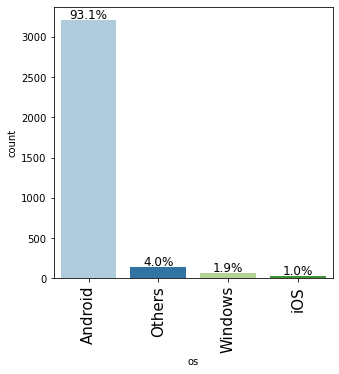

<IPython.core.display.Javascript object>

In [40]:
labeled_barplot(df, "os", perc=True)

In [41]:
os_counts = df["os"].value_counts()
os_counts

Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64

<IPython.core.display.Javascript object>

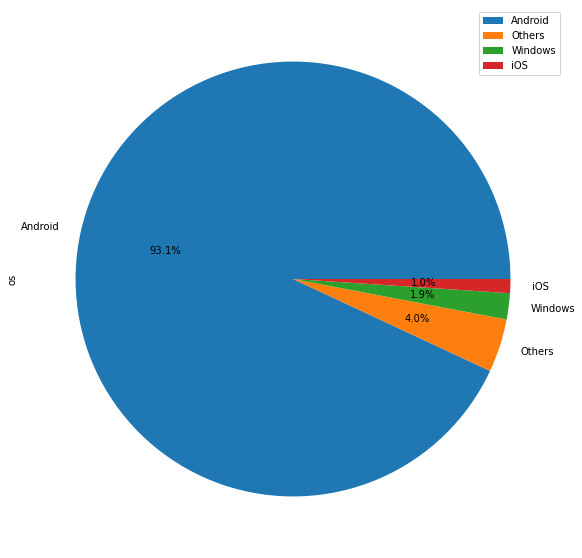

<IPython.core.display.Javascript object>

In [42]:
os_data = pd.DataFrame(
    {"os": [3214, 137, 67, 36]}, index=["Android", "Others", "Windows", "iOS"]
)
os_data.plot.pie(y="os", autopct="%1.1f%%", figsize=(10, 10))

##### Observations:
* 93.1% of the used device market is dominated by Android devices.
* The remaining 6.9% of the market is occupied by Others (4%), Windows (1.9%), and iOS (1.0%).

### Observations on 4g

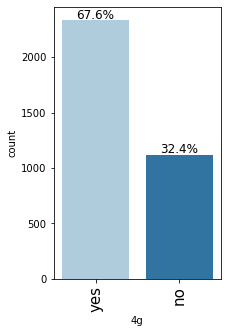

<IPython.core.display.Javascript object>

In [43]:
labeled_barplot(df, "4g", perc=True)

#### Observations
* A little over 2/3 of the devices are 4G.

### Observations on 5g

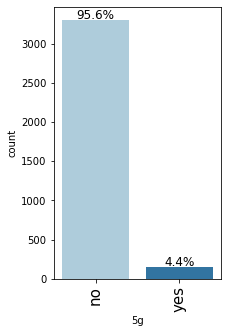

<IPython.core.display.Javascript object>

In [44]:
labeled_barplot(df, "5g", perc=True)

#### Observations
* 4.4% of the devices are 5G.

### Multivariate Analysis

#### Pairplot across numeric columns

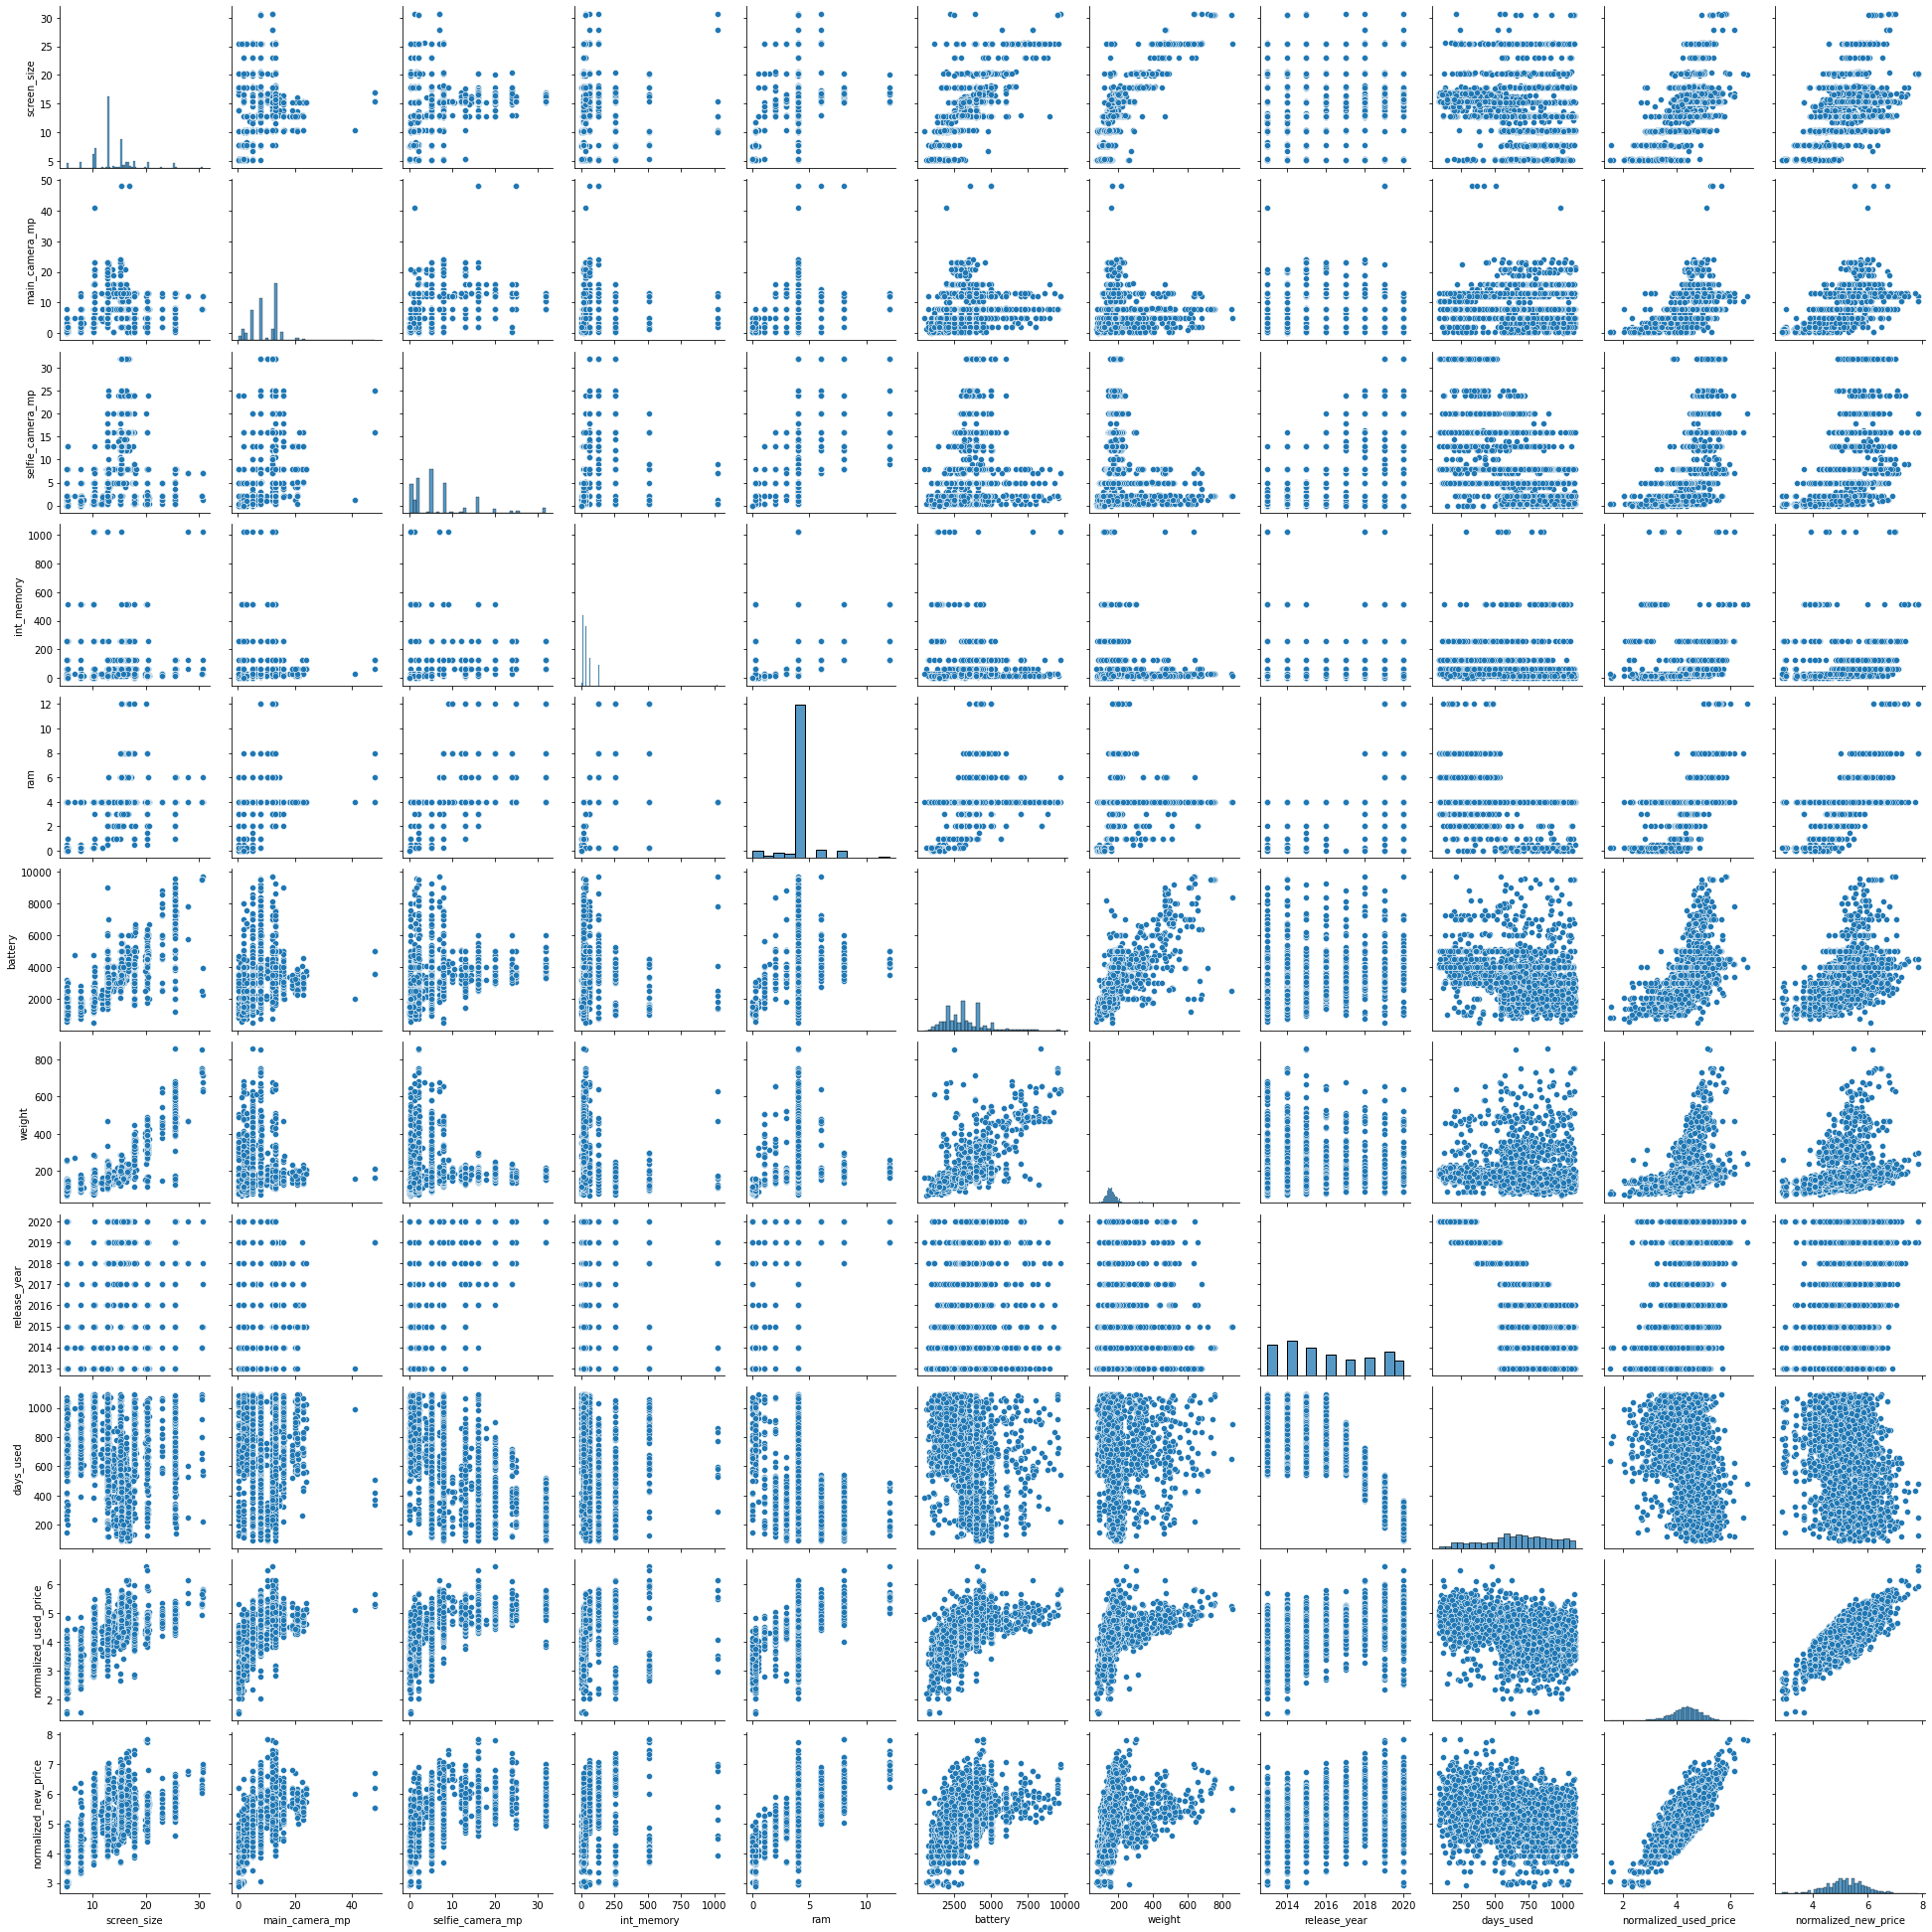

<IPython.core.display.Javascript object>

In [45]:
num_var = df.select_dtypes(include=np.number).columns.tolist()
sns.pairplot(df[num_var])

#### Observations
* The relationship between normalized used price and several of the numeric variables does not look linear.
* Normalized used price does appear to have a linear relationship with normalized used price.
* Normalized used price increases as most of the independent variables increase, but it decreases as days used increases.
* For newer release years, devices with greater ram and selfie_camera_mp begin to appear.
* Weight increases with battery capacity and also with screen size.

### Observations of os and brand name

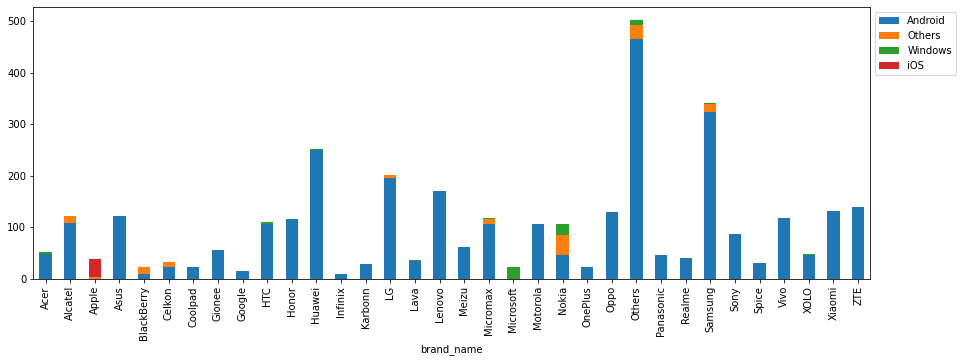

<IPython.core.display.Javascript object>

In [46]:
# create a stacked bar plot showing the number of devices of each operating system by brand
pd.crosstab(df["brand_name"], df["os"]).plot(kind="bar", stacked=True)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.gcf().set_size_inches(15, 5)
plt.show()

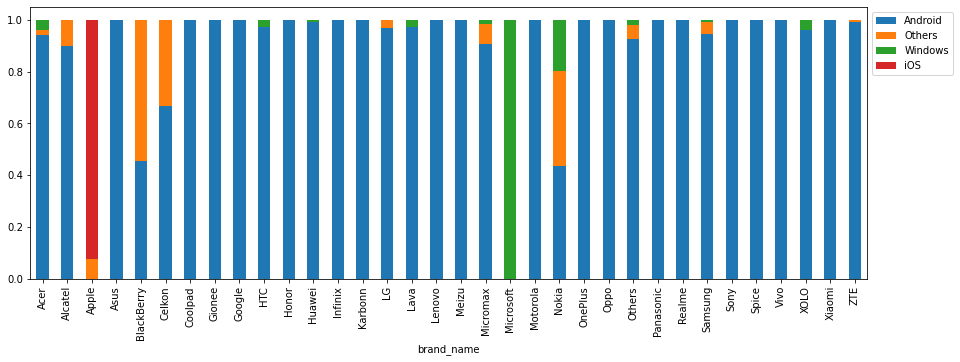

<IPython.core.display.Javascript object>

In [47]:
# normalize the plot above to more easily see the portion of devices with a given operating system by brand
pd.crosstab(df["brand_name"], df["os"], normalize="index").plot(
    kind="bar", stacked=True
)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.gcf().set_size_inches(15, 5)
plt.show()

#### Observations
* Most brands have devices with an Android operating system.
* All Microsoft devices have a Windows operating system.
* A small portion of devices outside of the Microsoft brand have a Windows operating system.
* Most Apple devices have iOS and no brands outside of Apple have iOS.

### 3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

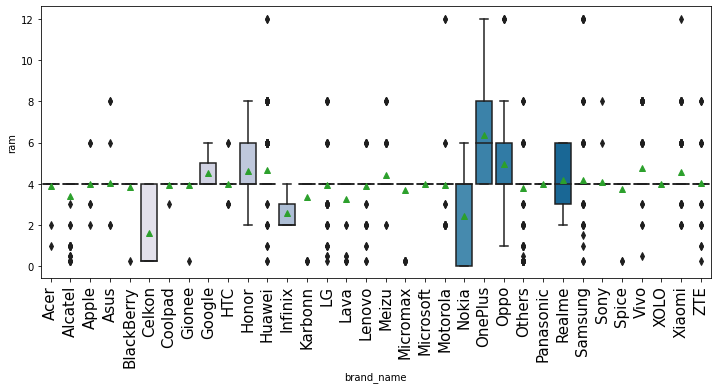

<IPython.core.display.Javascript object>

In [48]:
# create a boxplot to compare the ram distribution across brands
sns.boxplot(x="brand_name", y="ram", data=df, showmeans=True, palette="PuBu")
plt.gcf().set_size_inches(12, 5)
plt.xticks(rotation=90, fontsize=15)

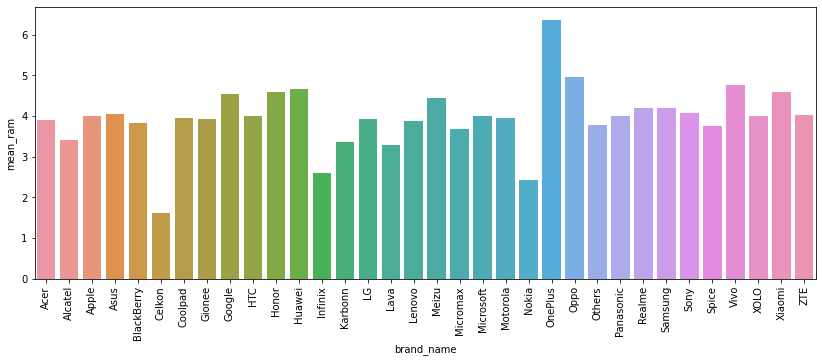

<IPython.core.display.Javascript object>

In [49]:
# create a bar plot to show mean ram by brand
brand_ram = df.groupby("brand_name")["ram"].mean().reset_index(name="mean_ram")
sns.barplot(x="brand_name", y="mean_ram", data=brand_ram)
plt.gcf().set_size_inches(14, 5)
plt.xticks(rotation=90)

### Observations
* Most brands contain several outliers in their ram distribution.
* The median ram for most device brands is 4.0 GB.
* The mean ram for most device brands is close to 4.0 GB.
* Celkon, Infinix, and Nokia devices have a lowest average ram.
* OnePlus devices have the highest average ram.

### 4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [50]:
large_battery = df[df["battery"] > 4500]

<IPython.core.display.Javascript object>

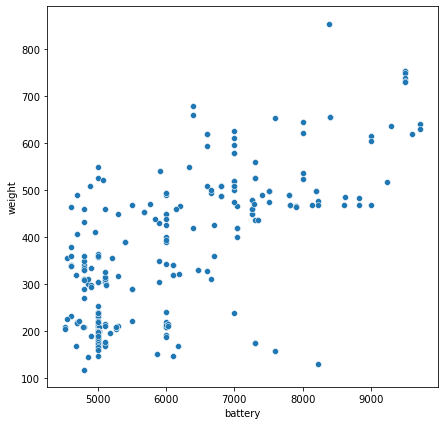

<IPython.core.display.Javascript object>

In [51]:
sns.scatterplot(x="battery", y="weight", data=large_battery)
plt.gcf().set_size_inches(7, 7)

In [52]:
print(round(large_battery.battery.corr(large_battery.weight), 2))

0.76


<IPython.core.display.Javascript object>

### Observations
* For phones and tablets offering large batteries, the weight is positively correlated with battery size.
* For phones and tablets with batteries greater than 4500 mAh, the correlation coeffiecient between battery size and device weight is 0.76. 

### Observations of device weight including all battery sizes

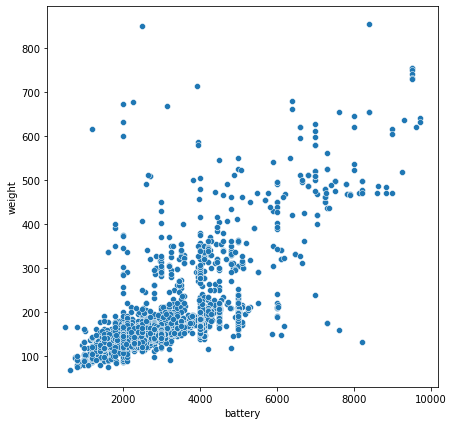

<IPython.core.display.Javascript object>

In [53]:
sns.scatterplot(x="battery", y="weight", data=df)
plt.gcf().set_size_inches(7, 7)

In [54]:
print(round(df.battery.corr(df.weight), 2))

0.7


<IPython.core.display.Javascript object>

### Observations
* The weight is positively correlated with battery size.
* When all devices are included the correlation between battery and weight is 0.7, whereas for phones and tablets with batteries greater than 4500 mAh, the correlation coeffiecient between battery size and device weight is 0.76. 

### 5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

There are 3362 devices with screen size greater than 6 inches.
97.34 percent of the total devices have a screen size greater than 6 inches


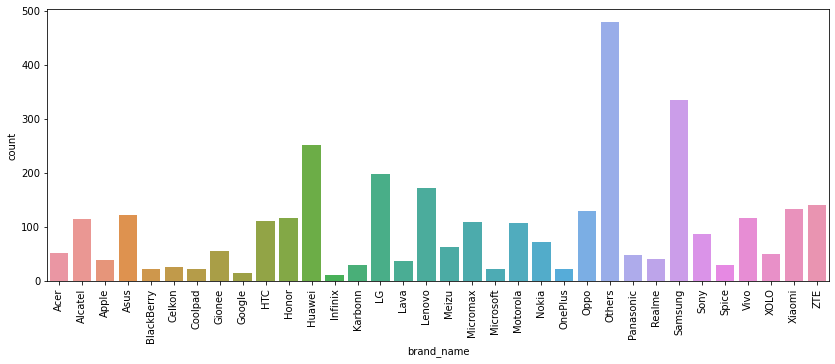

<IPython.core.display.Javascript object>

In [55]:
# dataframe keeping rows where screen size is > 6 inches
large_screen = df[df["screen_size"] > 6]

# data frame with brand name column and a column with the number of devices with screen size > 6 inches (per brand)
num_large_screen = (
    large_screen.groupby("brand_name")["screen_size"].count().reset_index(name="count")
)
# plot the number of devices with screen size > 6 inches by brand name
sns.barplot(x="brand_name", y="count", data=num_large_screen)
plt.gcf().set_size_inches(14, 5)
plt.xticks(rotation=90)

# The number of devices with screen sizes greater than 6 inches & percent this is out of all devices
percent = round(
    large_screen["screen_size"].count() / df["screen_size"].count() * 100, 2
)
print(
    f'There are {large_screen["screen_size"].count()} devices with screen size greater than 6 inches.'
)  # f-string
print(
    f"{percent} percent of the total devices have a screen size greater than 6 inches"
)

### Observations
* A mix of unidentified brands 'Others' when pooled together have the most devices with > 6 in. screens.
* Of the identified brands, Samsung, Hauwei, and LG have the most devices with > 6 in. screens

### Observations on main camera megapixels by brand

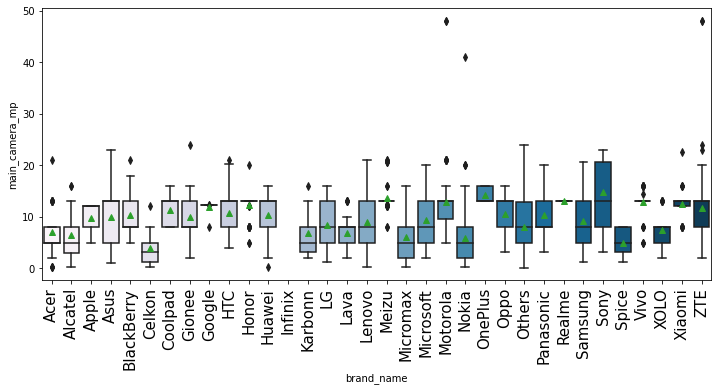

<IPython.core.display.Javascript object>

In [56]:
# create a boxplot to compare the main camera MP distribution across brands
sns.boxplot(x="brand_name", y="main_camera_mp", data=df, showmeans=True, palette="PuBu")
plt.gcf().set_size_inches(12, 5)
plt.xticks(rotation=90, fontsize=15)

#### Observations
* Most brands have devices with main cameras mp less than 20 megapixels
* Several brands have outliers.
* Motorola, Nokia, and ZTE in particular have very large outliers.

### Observations on selfie camera megapixels by brand

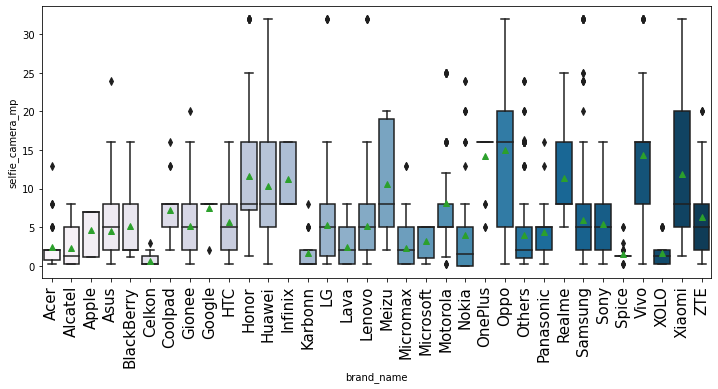

<IPython.core.display.Javascript object>

In [57]:
# create a boxplot to compare the selfie camera MP distribution across brands
sns.boxplot(
    x="brand_name", y="selfie_camera_mp", data=df, showmeans=True, palette="PuBu"
)
plt.gcf().set_size_inches(12, 5)
plt.xticks(rotation=90, fontsize=15)

#### Observations
* More than half of the brands have selfie camera mp medians below 8 mp.
* Oppo has the gratest selfie camera mp median.

### 6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [58]:
# dataframe keeping rows where selfie cam is > 8 MP
selfie_cam_gt_8 = df[df["selfie_camera_mp"] > 8]

# Get top 5 brands with highest number of devices with selfie cam > 8 MP
top5_cam = selfie_cam_gt_8["brand_name"].value_counts()[:5].reset_index(name="counts")
top5_cam.rename(columns={"index": "brand_name"}, inplace=True)
top5_cam

,brand_name,counts
0,Huawei,87
1,Vivo,78
2,Oppo,75
3,Xiaomi,63
4,Samsung,57


<IPython.core.display.Javascript object>

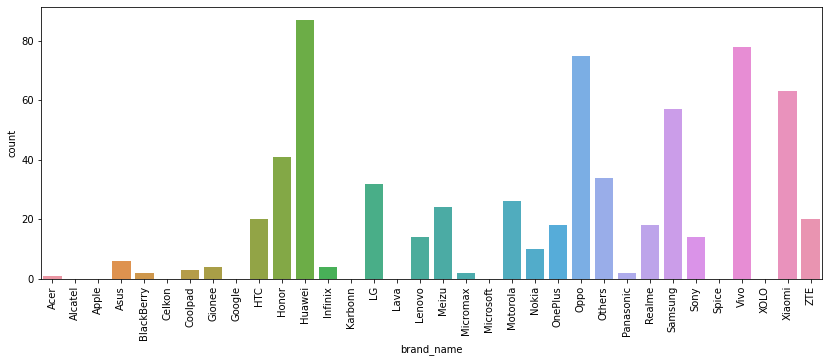

<IPython.core.display.Javascript object>

In [59]:
# data frame with brand name column and a column with the number of devices with selfie cam > 8 MP
num_gt8 = (
    selfie_cam_gt_8.groupby("brand_name")["selfie_camera_mp"]
    .count()
    .reset_index(name="count")
)
# plot the number of devices from each brand with a selfie cam of greater than 8 MP.
sns.barplot(x="brand_name", y="count", data=num_gt8)
plt.gcf().set_size_inches(14, 5)
plt.xticks(rotation=90)

### Observations
* Huawei has the most devices (87) with greater than 8 MP selfie cams.
* Vivo, Oppo, and Xiaomi all have at least 60 devices with greater than 8 MP selfie cams.

### Normalized used device price, selfie camera mp, and 4g

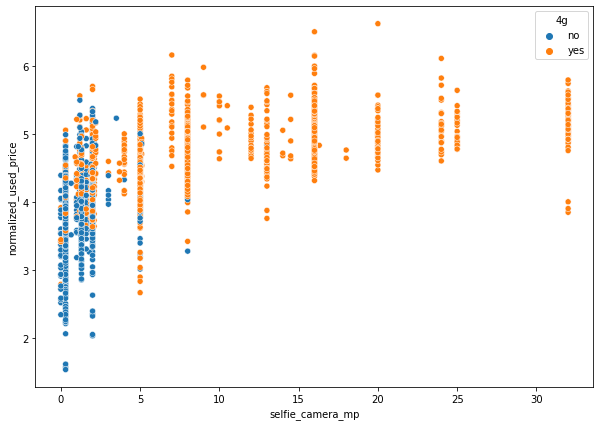

<IPython.core.display.Javascript object>

In [60]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="normalized_used_price", x="selfie_camera_mp", hue="4g", data=df)
plt.show()

#### Observations
*Devices with less selfie camera mp are typically not 4g, but they still have quite a bit of price variation.

### Normalized used price, battery, and 4g

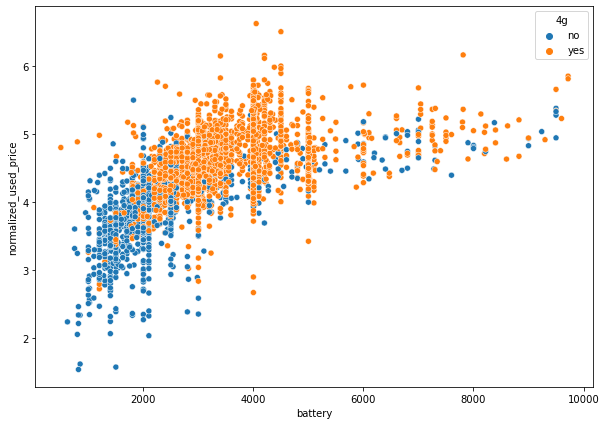

<IPython.core.display.Javascript object>

In [61]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="normalized_used_price", x="battery", hue="4g", data=df)
plt.show()

#### Observations
* 4g devices generally have more battery capacity.
* the normalized used price increases with battery size for devices with batteries less than about 4500 mAh.
* For batteries greater than 4500 mAh, the price is fairly steady.

### Observations of normalized used price with release year

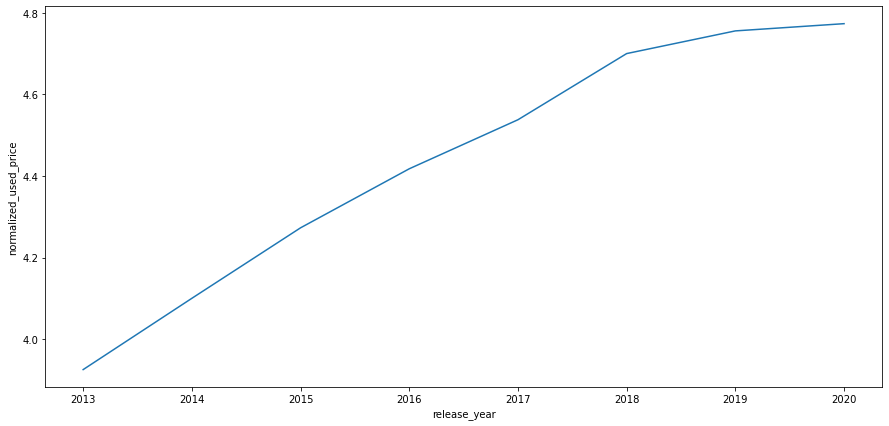

<IPython.core.display.Javascript object>

In [62]:
# average life expectancy over the years
plt.figure(figsize=(15, 7))
sns.lineplot(x="release_year", y="normalized_used_price", data=df, ci=None)
plt.show()

#### Observations
* the normalized used device price steadily increases with release year for devices released between 2013 and 2018.
* The rate of normalized used device price increase is much less for devices released between 2018 and 2020.

### 7. Which attributes are highly correlated with the normalized price of a used device?

In [63]:
num_var = df.select_dtypes(include=np.number).columns.tolist()

<IPython.core.display.Javascript object>

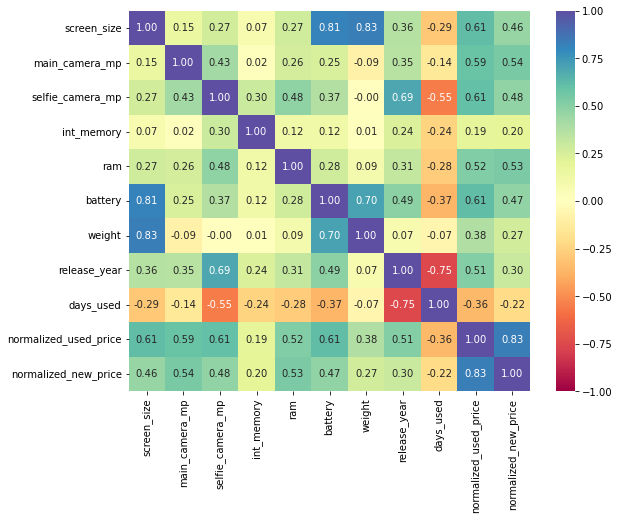

<IPython.core.display.Javascript object>

In [64]:
# Check for correlation among numerical variables
corr = df[num_var].corr()

# plot the heatmap
sns.heatmap(
    corr,
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
    xticklabels=corr.columns,
    yticklabels=corr.columns,
)
plt.gcf().set_size_inches(9, 7)
plt.show()

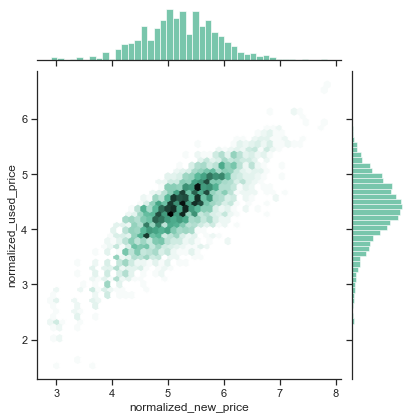

<IPython.core.display.Javascript object>

In [65]:
sns.set_theme(style="ticks")
sns.jointplot(
    x=df.normalized_new_price, y=df.normalized_used_price, kind="hex", color="#4CB391"
)

#### Observations
* The attribute that is most highly correlated with the normalized price of a used device is the normalized price of a new device.
* Screen size, selfie camera mp, and battery also have a positive correlation with the price of a used device.
* To a slightly lesser degree, main camera mp, ram, and release year have a positive correlation with the price of a used device.

### normalized used price by 4g & 5g

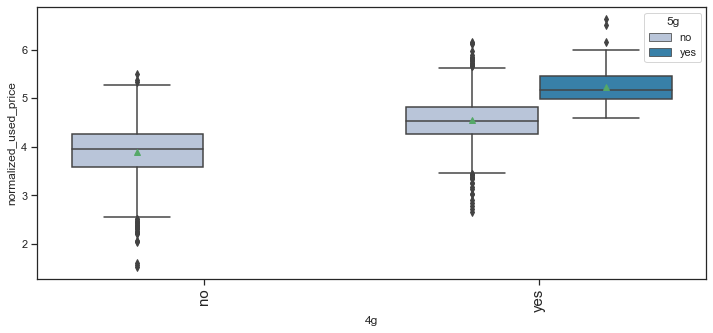

<IPython.core.display.Javascript object>

In [66]:
# create a boxplot to compare the selfie camera MP distribution across brands, for devices with greater than 8 MP
sns.boxplot(
    x="4g", y="normalized_used_price", hue="5g", data=df, showmeans=True, palette="PuBu"
)
plt.gcf().set_size_inches(12, 5)
plt.xticks(rotation=90, fontsize=15)

In [67]:
# create the contingency table showing the control group landing page and treatment group landing page
contingency_table = pd.crosstab(df["4g"], df["5g"])
contingency_table

5g,no,yes
4g,,
no,1119,0
yes,2183,152


<IPython.core.display.Javascript object>

#### Observations
* There are no 5G devices that are not 4G devices.
* The normalized used price distribution is greater for 4G devices than no-4G devices.
* Of the 4G devices, the normalized used price distribution is greater for those that are also 5G devices.

### normalized used price by os

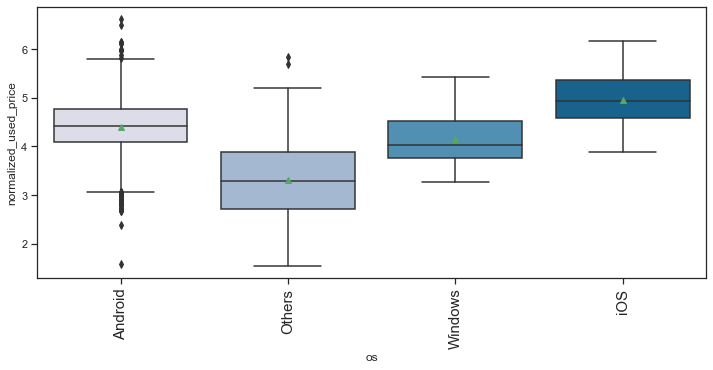

<IPython.core.display.Javascript object>

In [68]:
# create a boxplot to compare the selfie camera MP distribution across brands, for devices with greater than 8 MP
sns.boxplot(x="os", y="normalized_used_price", data=df, showmeans=True, palette="PuBu")
plt.gcf().set_size_inches(12, 5)
plt.xticks(rotation=90, fontsize=15)

#### Observations
* iOs devices have the greatest mean and median normalized used price.
* The normalized used price mean and median for android devices are slightly greater than that of Windows devices.
* The others category has the lowest mean and median normalized used price.

### normalized used price by brand name

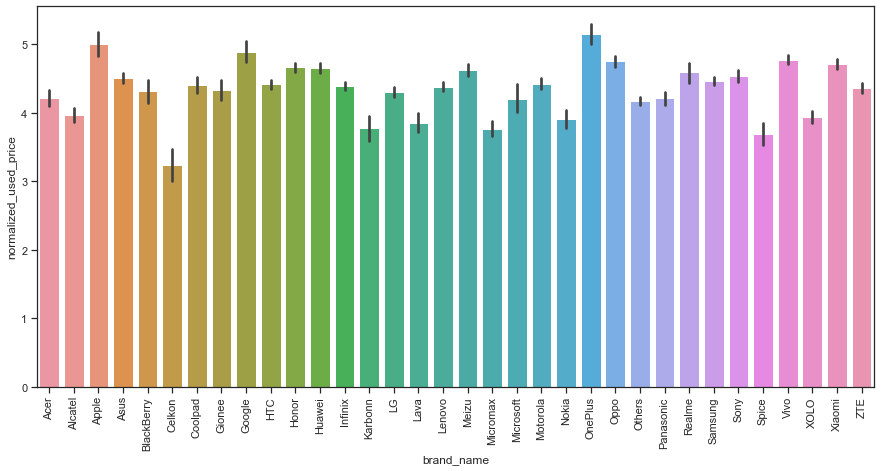

<IPython.core.display.Javascript object>

In [69]:
plt.figure(figsize=(15, 7))
sns.barplot(data=df, y="normalized_used_price", x="brand_name")
plt.xticks(rotation=90)

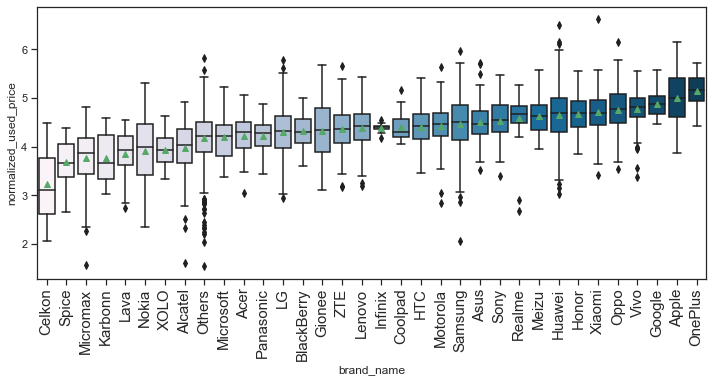

<IPython.core.display.Javascript object>

In [70]:
brand = df.groupby("brand_name")
# create a boxplot to compare the selfie camera MP distribution across brands, for devices with greater than 8 MP
sns.boxplot(
    x="brand_name",
    y="normalized_used_price",
    data=df,
    showmeans=True,
    palette="PuBu",
    order=brand.normalized_used_price.mean().sort_values().index,
)
plt.gcf().set_size_inches(12, 5)
plt.xticks(rotation=90, fontsize=15)

### Observations
* There are differences in the normalized used price distributions of devices that come from different brands.
* Several of the brands have devices with normalized used price outliers.
* For most brands, the mean normalized used price is fairly close to the median normailized used price.
* OnePlus and Apple have the highest mean and median normalized used device prices.
* Celkon has the lowest mean and median normalized used device price.

### <a id='link1'>Summary of EDA</a>

* There screen size and battery size appear to increase the weight of a device.
* Of all attributes, normalized used price is the most closely correlated to normalized new price.
* Of all attributes, normalized used price is the least correlated to internal memory.
* Normalized used price is negatvely correlated to days used.
* 5G devices have higher normalized used price than 4G only devices, which have a higher normalized used price than non-4G devices.
* iOs devices have the highest normalized used price on average and Others have the lowest mean normalized used price.
* The majority of devices have an Android os.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value Treatment

In [71]:
# checking missing values
df.isna().sum().sort_values(ascending=False)

main_camera_mp           179
weight                     7
battery                    6
int_memory                 4
ram                        4
selfie_camera_mp           2
brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

In [72]:
# filling missing numeric missing values using the column median
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller, axis=0)

<IPython.core.display.Javascript object>

In [73]:
# checking missing values
df.isna().sum().sort_values(ascending=False)

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<IPython.core.display.Javascript object>

- All the missing values have been treated.

### Feature Engineering

### Variable Transformations
* checking for skewness

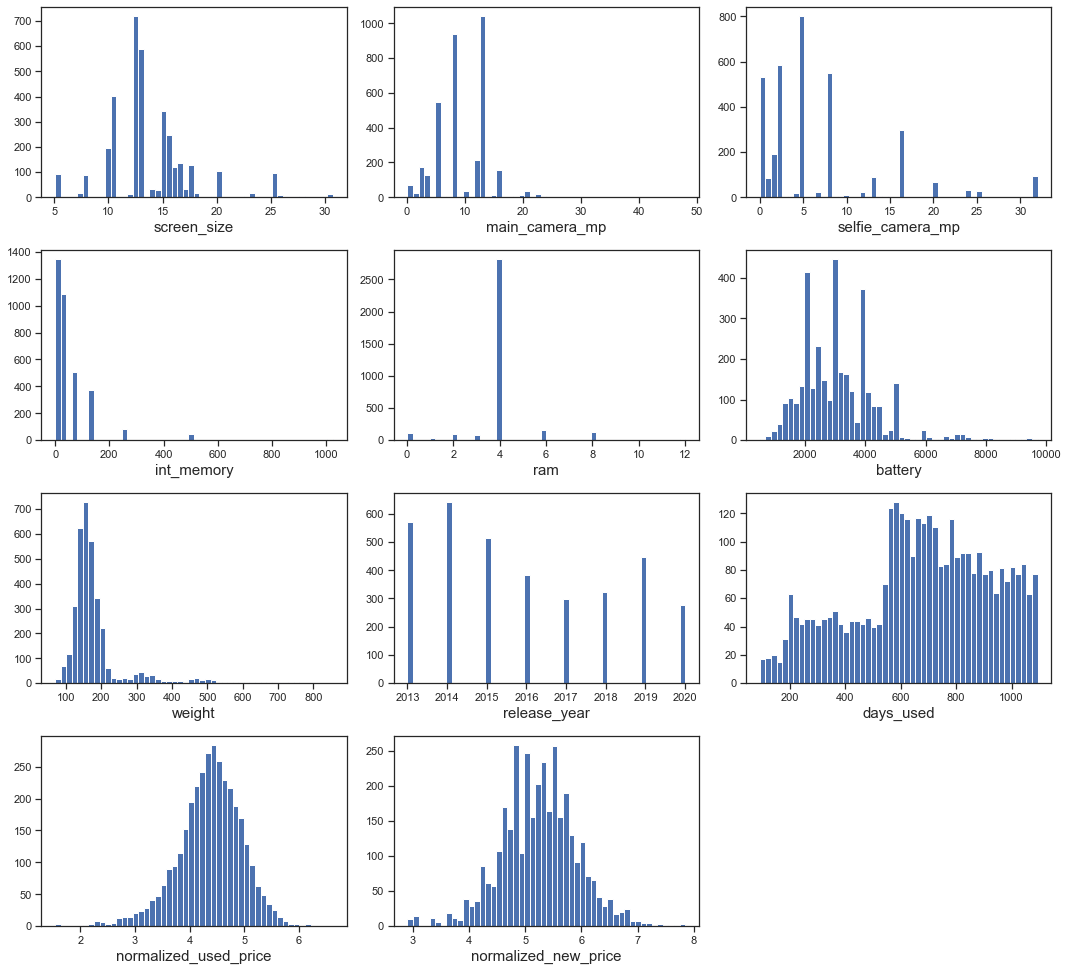

<IPython.core.display.Javascript object>

In [74]:
plt.figure(figsize=(15, 30))

for i in range(len(num_var)):
    plt.subplot(9, 3, i + 1)
    plt.hist(df[num_var[i]], bins=50)
    plt.tight_layout()
    plt.xlabel(num_var[i], fontsize=15)

plt.show()

### Observations
* Internal memory is slightly pinned at zero.
* Weight, battery, main camera mp, and selfie camera mp have a fair amount of right skew.
* It appears that the other numeric columns have minimal skewnewness in the data.
* Since none of the columns are severely pinned at zero, no transformations will be used at this stage.
* If there is an issue with the residuals in a later section, then feature engineering will be revisited.

### Outlier Detection

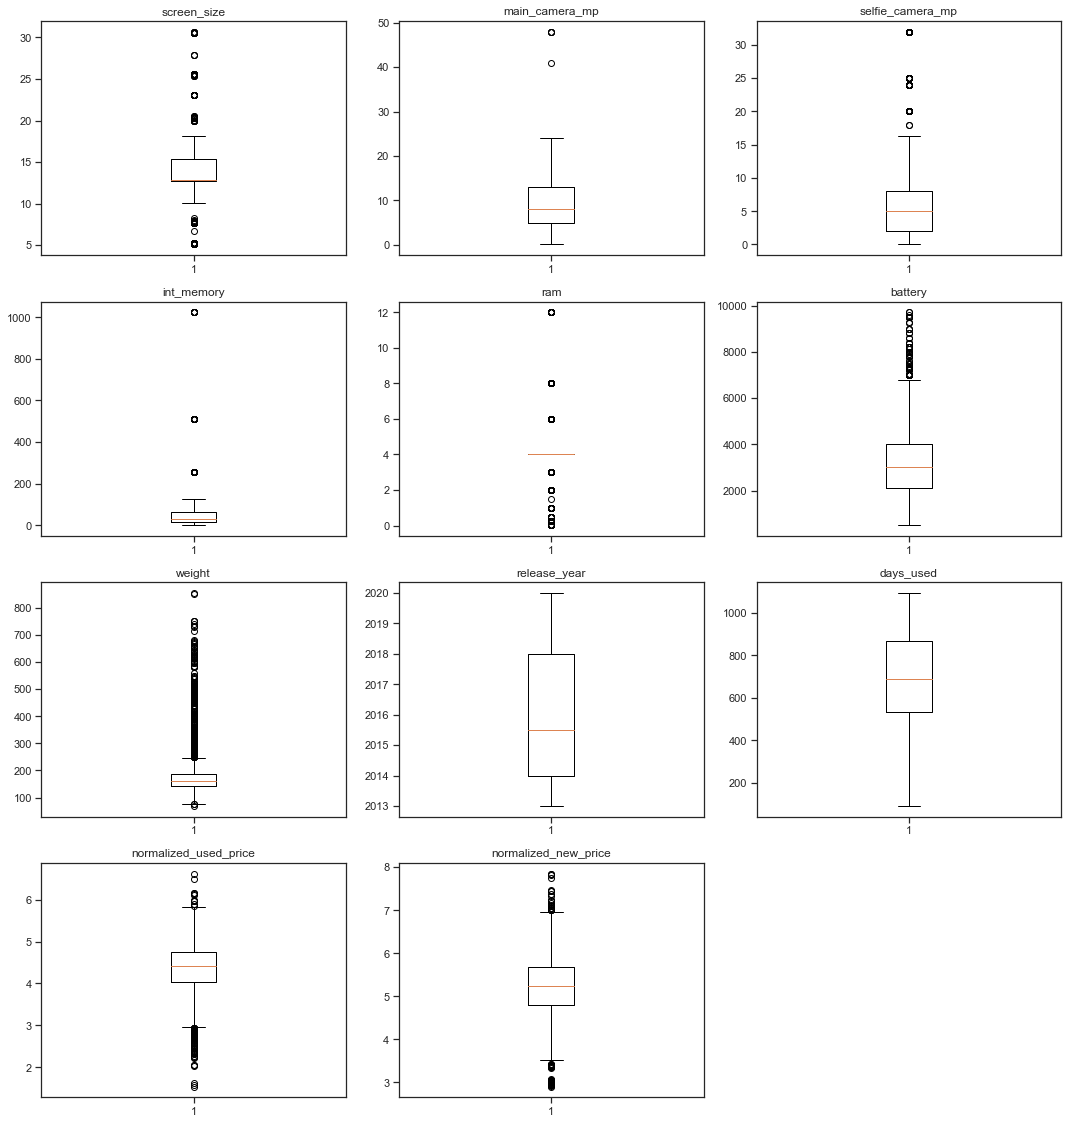

<IPython.core.display.Javascript object>

In [75]:
# create a boxplot of all the numeric columns
plt.figure(figsize=(15, 35))
for i, variable in enumerate(num_var):
    plt.subplot(9, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)


plt.show()

#### Observations
* Several of the numeric columns have outliers.
* Variation will be lost if ram outliers are removed, therefore ram outliers will be kept.
* From the plot of weight vs battery size for batteries > 4500 mAh in the EDA section, it appears that the upper end of the weight and battery distributions contain meaningful data.
* The first model will be created keeping all outliers.

## EDA

- Since no columns were tranformed and outliers were kept, the largest preprocessing change to the data was imputing missing values of main camera mp with the median value.

### main camera mp

* 176 missing values were filled in with the median value.

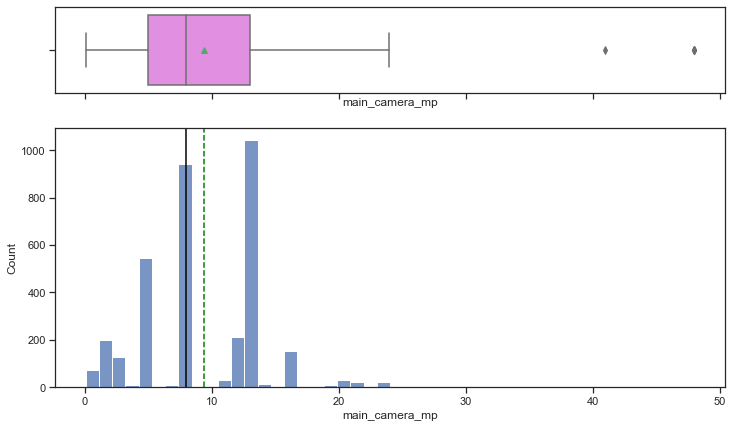

<IPython.core.display.Javascript object>

In [76]:
histogram_boxplot(df, "main_camera_mp")

In [77]:
print(
    f"The mean main camera mp is {round(df.main_camera_mp.mean(),1)} megapixels and the median main camera mp is {round(df.main_camera_mp.median(),1)} megapixels."
)

The mean main camera mp is 9.4 megapixels and the median main camera mp is 8.0 megapixels.


<IPython.core.display.Javascript object>

#### Observations
* The mean changed from 9.5 to 9.4 megapixels and the median stayed the same at 8.0 megapixels.

## Building a Linear Regression model

#### Variables to drop
* There are high correlations between os & certain brands (i.e. Apple brand is highly correlated to iOS & Microsoft is highly correlated to Windows) 
* Dropping brand name to avoid overfitting and multicollinearity issues.

In [78]:
# defining the variables
X = df.drop(["normalized_used_price", "brand_name"], axis=1)
y = df["normalized_used_price"]

<IPython.core.display.Javascript object>

In [79]:
# let's add the intercept to data
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [80]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# to ensure all variables are of float type
X = X.astype(float)

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_new_price,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020.0,127.0,4.715100,0.0,0.0,0.0,1.0,0.0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020.0,325.0,5.519018,0.0,0.0,0.0,1.0,1.0
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020.0,162.0,5.884631,0.0,0.0,0.0,1.0,1.0
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020.0,345.0,5.630961,0.0,0.0,0.0,1.0,1.0
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020.0,293.0,4.947837,0.0,0.0,0.0,1.0,0.0


<IPython.core.display.Javascript object>

In [81]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [82]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

In [83]:
# fitting a linear model
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     847.8
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           15:23:17   Log-Likelihood:                 95.399
No. Observations:                   2417   AIC:                            -158.8
Df Residuals:                       2401   BIC:                            -66.15
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

### Observations 
*  The value of Adj. R-squared is **0.840**
* Since adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, this could be considered a good fit.
* The const coefficient (y-intercept) is **-53.16**
* The predictor variable with the largest coeffiecient is normalized_new_price, with a coefficient of **0.42**.

## Model performance evaluation

* Using metric functions defined in sklearn for RMSE, MAE, and $R^2$.

* Using user defined functions to calculate adjusted $R^2$ and MAPE.

In [84]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE - measures the accuracy of predictions as a percentage can be calculated
# as the average absolute percent error for each predicted value minus actual values divided by actual values.
# It works best if there are no extreme values in the data and none of the actual values are 0.
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [85]:
# Checking model performance on train set
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.232606,0.182847,0.84119,0.840132,4.389688


<IPython.core.display.Javascript object>

In [86]:
# Checking model performance on test set
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.236969,0.182516,0.84431,0.841867,4.458332


<IPython.core.display.Javascript object>

**Observations**

- The training $R^2$ is 0.84, so the model is not underfitting.

- The train and test RMSE and MAE are comparable, so the model is not overfitting either.

- MAE suggests that the model can predict normalized_used_price within a mean error of 0.18 euros on the test data.

- MAPE of 4.5 on the test data means that we are able to predict within 4.5% of the normalized_used_price.

## Checking Linear Regression Assumptions

Checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

#### Testing for no Multicollinearity

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [88]:
checking_vif(x_train)

,feature,VIF
0,const,3.570595e+06
1,screen_size,7.257522e+00
2,main_camera_mp,1.924868e+00
3,selfie_camera_mp,2.572363e+00
4,int_memory,1.247150e+00
5,ram,2.103621e+00
6,battery,3.835618e+00
7,weight,6.120544e+00
8,release_year,4.613026e+00
9,days_used,2.589619e+00


<IPython.core.display.Javascript object>

#### Observations
* screen_size and weight have VIF values greater than 5.

### Removing Multicollinearity

In [89]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [90]:
col_list = ["screen_size", "weight"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weight,0.836986,0.235714
1,screen_size,0.836471,0.236086


<IPython.core.display.Javascript object>

#### Observations
* Dropping either of these variables has a small impact on $R^2$.
* Since dropping weight has a very slightly smaller reduction of $R^2$ than dropping screen_size, weight will be dropped first.

In [91]:
col_to_drop = "weight"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight


,feature,VIF
0,const,3.441525e+06
1,screen_size,3.388518e+00
2,main_camera_mp,1.842709e+00
3,selfie_camera_mp,2.537169e+00
4,int_memory,1.246894e+00
5,ram,2.100018e+00
6,battery,3.463821e+00
7,release_year,4.442759e+00
8,days_used,2.574507e+00
9,normalized_new_price,2.652817e+00


<IPython.core.display.Javascript object>

#### Observations
* The VIF for all variables is less than 5.

In [92]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     887.1
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           15:24:03   Log-Likelihood:                 70.841
No. Observations:                   2417   AIC:                            -111.7
Df Residuals:                       2402   BIC:                            -24.83
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

#### Observations
* Weight is no longer a predictor variable in the model.
* The adjusted $R^2$ has changed slightly from 0.840 to 0.837.

### Dropping variables with p values > 0.05
* $H_o$ : Independent feature is not significant ($\beta_i = 0$)
* $H_a$ : Independent feature is that it is significant ($\beta_i \neq 0$)


* (P>|t|) gives the p-value for each independent feature to check that null hypothesis. Using 0.05 (5%) as significance level.
        
* A p-value of less than 0.05 is considered to be statistically significant.

In [93]:
# This loop drops p-values one column at a time and checks for changes before dropping the next p-value.
# 1. Builds a model, checks the p-values of the variables, and drops the column with the highest p-value.
# 2. Creates a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
# 3. Repeat the above two steps until there are no columns with p-value > 0.05.

# initial list of columns
cols = x_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train2[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'release_year', 'normalized_new_price', '4g_yes']


<IPython.core.display.Javascript object>

In [94]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

<IPython.core.display.Javascript object>

In [95]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.837
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1774.
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           15:24:13   Log-Likelihood:                 67.613
No. Observations:                   2417   AIC:                            -119.2
Df Residuals:                       2409   BIC:                            -72.90
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

**Now no feature has p-value greater than 0.05**

**Observations**

* Now adjusted $R^2$ is 0.837, i.e., the model is able to explain ~84% of the variance. This shows that the model is good.
* The adjusted $R^2$ in *olsmod0* (where we considered all the variables except brand name) was 0.840. This shows that the variables that were dropped were not affecting the model much.

**Remaining assumptions to check on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

In [96]:
# dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.865253,0.222235
1525,4.448399,4.581051,-0.132651
1128,4.315353,4.286071,0.029282
3003,4.282068,4.258824,0.023244
2907,4.456438,4.459768,-0.003330


<IPython.core.display.Javascript object>

### plot of fitted values vs residuals.

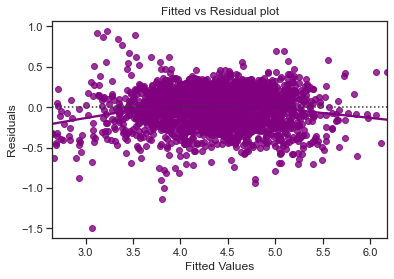

<IPython.core.display.Javascript object>

In [97]:
# plot the fitted values vs residuals
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* Since there is no pattern in the plot above, the assumptions of linearity and independence are satisfied.

* Based on the residual plot above, it appears that variable transformations may not be necessary.

### TEST FOR NORMALITY

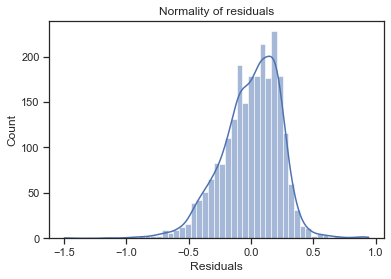

<IPython.core.display.Javascript object>

In [98]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals appears a little bit left skewed.
- Checking the Q-Q plot below.

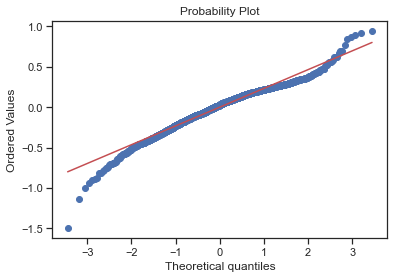

<IPython.core.display.Javascript object>

In [99]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [100]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9720368981361389, pvalue=2.5155909423510455e-21)

<IPython.core.display.Javascript object>

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- Note: int_memory was under consideration for log variable transformation, but this column is no longer a part of the model. Variable transformation will be revisited this time transforming the int_memory column to see if the model changes in an effort to improve the normality of the residuals.

### Feature Engineering - Variable Transformation

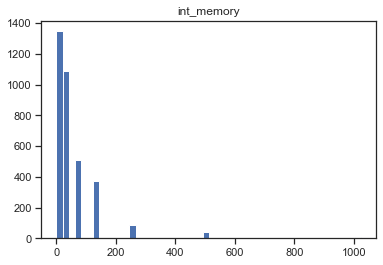

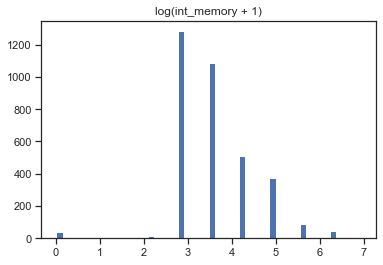

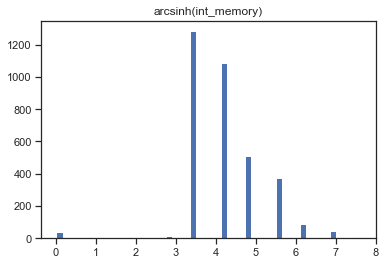

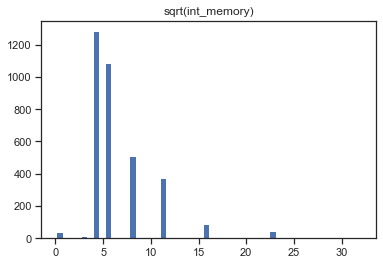

<IPython.core.display.Javascript object>

In [101]:
# original column
plt.hist(df["int_memory"], 50)
plt.title("int_memory")
plt.show()
# log(values +1)
plt.hist(np.log(df["int_memory"] + 1), 50)
plt.title("log(int_memory + 1)")
plt.show()
# arcsin(values)
plt.hist(np.arcsinh(df["int_memory"]), 50)
plt.title("arcsinh(int_memory)")
plt.show()
# sqrt(values)
plt.hist(np.sqrt(df["int_memory"]), 50)
plt.title("sqrt(int_memory)")
plt.show()

### Observations
* Of the possible transformations of the int_memory column, the log transformation will be used since it does a good job of centering the distribution and is less complex than arcsinh.

In [102]:
# create a new column int_memory_log and drop int_memory
df["int_memory_log"] = np.log(df["int_memory"] + 1)
df.drop("int_memory", axis=1, inplace=True)

<IPython.core.display.Javascript object>

### EDA

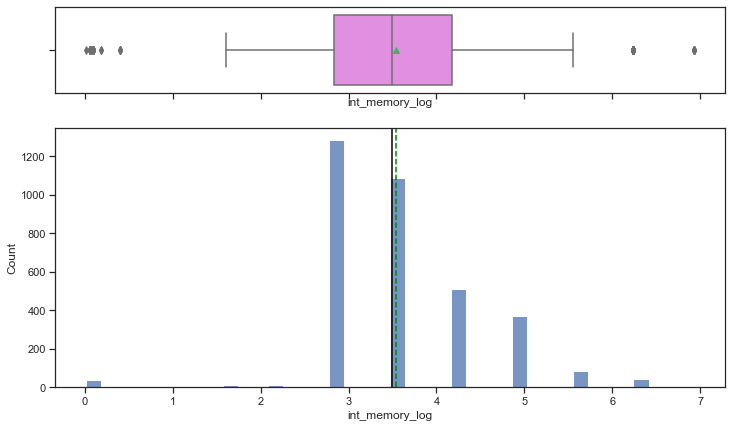

<IPython.core.display.Javascript object>

In [103]:
histogram_boxplot(df, "int_memory_log")

#### Observations:
* The int_memory_log distribution is more centered than the int_memory distribution.

## Building a Linear Regression model

In [104]:
# defining the variables the same as the model above
X = df.drop(["normalized_used_price", "brand_name"], axis=1)
y = df["normalized_used_price"]

<IPython.core.display.Javascript object>

In [105]:
# let's add the intercept to data
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [106]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# to ensure all variables are of float type
X = X.astype(float)

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,ram,battery,weight,release_year,days_used,normalized_new_price,int_memory_log,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,3.0,3020.0,146.0,2020.0,127.0,4.715100,4.174387,0.0,0.0,0.0,1.0,0.0
1,1.0,17.30,13.0,16.0,8.0,4300.0,213.0,2020.0,325.0,5.519018,4.859812,0.0,0.0,0.0,1.0,1.0
2,1.0,16.69,13.0,8.0,8.0,4200.0,213.0,2020.0,162.0,5.884631,4.859812,0.0,0.0,0.0,1.0,1.0
3,1.0,25.50,13.0,8.0,6.0,7250.0,480.0,2020.0,345.0,5.630961,4.174387,0.0,0.0,0.0,1.0,1.0
4,1.0,15.32,13.0,8.0,3.0,5000.0,185.0,2020.0,293.0,4.947837,4.174387,0.0,0.0,0.0,1.0,0.0


<IPython.core.display.Javascript object>

In [107]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [108]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

In [109]:
# fitting a linear model
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     848.3
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           15:25:04   Log-Likelihood:                 95.974
No. Observations:                   2417   AIC:                            -159.9
Df Residuals:                       2401   BIC:                            -67.30
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

### Observations 
*  The value for adj. R-squared is **0.840**
* Since adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, this could be considered a good fit.
* The const coefficient (y-intercept) is **-52.05**
* The predictor variable with the largest coeffiecient is normalized_new_price, with a coefficient of **0.42**.

## Model performance evaluation

* Using metric functions defined in sklearn for RMSE, MAE, and $R^2$.

* Using user defined functions to calculate adjusted $R^2$ and MAPE.

In [110]:
# Checking model performance on train set
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.232551,0.182733,0.841266,0.840208,4.388019


<IPython.core.display.Javascript object>

In [111]:
# Checking model performance on test set
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.237027,0.182433,0.844234,0.84179,4.459557


<IPython.core.display.Javascript object>

**Observations**

- The training $R^2$ is 0.84, so the model is not underfitting.

- The train and test RMSE and MAE are comparable, so the model is not overfitting either.

- MAE suggests that the model can predict normalized_used_price within a mean error of 0.18 euros on the test data.

- MAPE of 4.5 on the test data means that we are able to predict within 4.5% of the normalized_used_price.

## Checking Linear Regression Assumptions

Checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

#### Testing for no Multicollinearity

In [112]:
checking_vif(x_train)

,feature,VIF
0,const,3.611178e+06
1,screen_size,7.254058e+00
2,main_camera_mp,1.910467e+00
3,selfie_camera_mp,2.654607e+00
4,ram,2.082351e+00
5,battery,3.836457e+00
6,weight,6.120758e+00
7,release_year,4.667499e+00
8,days_used,2.592774e+00
9,normalized_new_price,2.648064e+00


<IPython.core.display.Javascript object>

#### Observations
* screen_size and weight have VIF values greater than 5.

### Removing Multicollinearity

In [113]:
col_list = ["screen_size", "weight"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weight,0.837055,0.235664
1,screen_size,0.836570,0.236014


<IPython.core.display.Javascript object>

#### Observations
* Dropping either of these variables has a small impact on Adj. $R^2$.
* Since dropping weight has a very slightly smaller reduction of Adj. $R^2$ than dropping screen_size, weight will be dropped first.

In [114]:
col_to_drop = "weight"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight


,feature,VIF
0,const,3.483404e+06
1,screen_size,3.382296e+00
2,main_camera_mp,1.828952e+00
3,selfie_camera_mp,2.620266e+00
4,ram,2.079146e+00
5,battery,3.463844e+00
6,release_year,4.498973e+00
7,days_used,2.577767e+00
8,normalized_new_price,2.642262e+00
9,int_memory_log,1.710051e+00


<IPython.core.display.Javascript object>

#### Observations
* The VIF for all variables is less than 5.

In [115]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     887.5
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           15:25:32   Log-Likelihood:                 71.355
No. Observations:                   2417   AIC:                            -112.7
Df Residuals:                       2402   BIC:                            -25.85
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

#### Observations
* Weight is no longer a predictor variable in the model.
* The adjusted $R^2$ has changed slightly from 0.840 to 0.837.

### Dropping variables with p values > 0.05
* $H_o$ : Independent feature is not significant ($\beta_i = 0$)
* $H_a$ : Independent feature is that it is significant ($\beta_i \neq 0$)


* (P>|t|) gives the p-value for each independent feature to check that null hypothesis. Using 0.05 (5%) as significance level.
        
* A p-value of less than 0.05 is considered to be statistically significant.

In [116]:
# This loop drops p-values one column at a time and checks for changes before dropping the next p-value.
# 1. Builds a model, checks the p-values of the variables, and drops the column with the highest p-value.
# 2. Creates a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
# 3. Repeat the above two steps until there are no columns with p-value > 0.05.

# initial list of columns
cols = x_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train2[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'release_year', 'normalized_new_price', '4g_yes']


<IPython.core.display.Javascript object>

In [117]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

<IPython.core.display.Javascript object>

In [118]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.837
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1774.
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           15:25:46   Log-Likelihood:                 67.613
No. Observations:                   2417   AIC:                            -119.2
Df Residuals:                       2409   BIC:                            -72.90
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

### Observations
* This model is the same as the model above that was build without the log transformation of int_memory.
* This result is not unexpected given that int_memory was filtered out of the first model as the column had a p-value >0.05, and now int_memory_log was also removed from the second model with a p-value >0.05.
* Before moving onto a final model, outlier detection will be revisited to see if outlier treatment will help improve the normality of the residuals.

### Outlier Detection

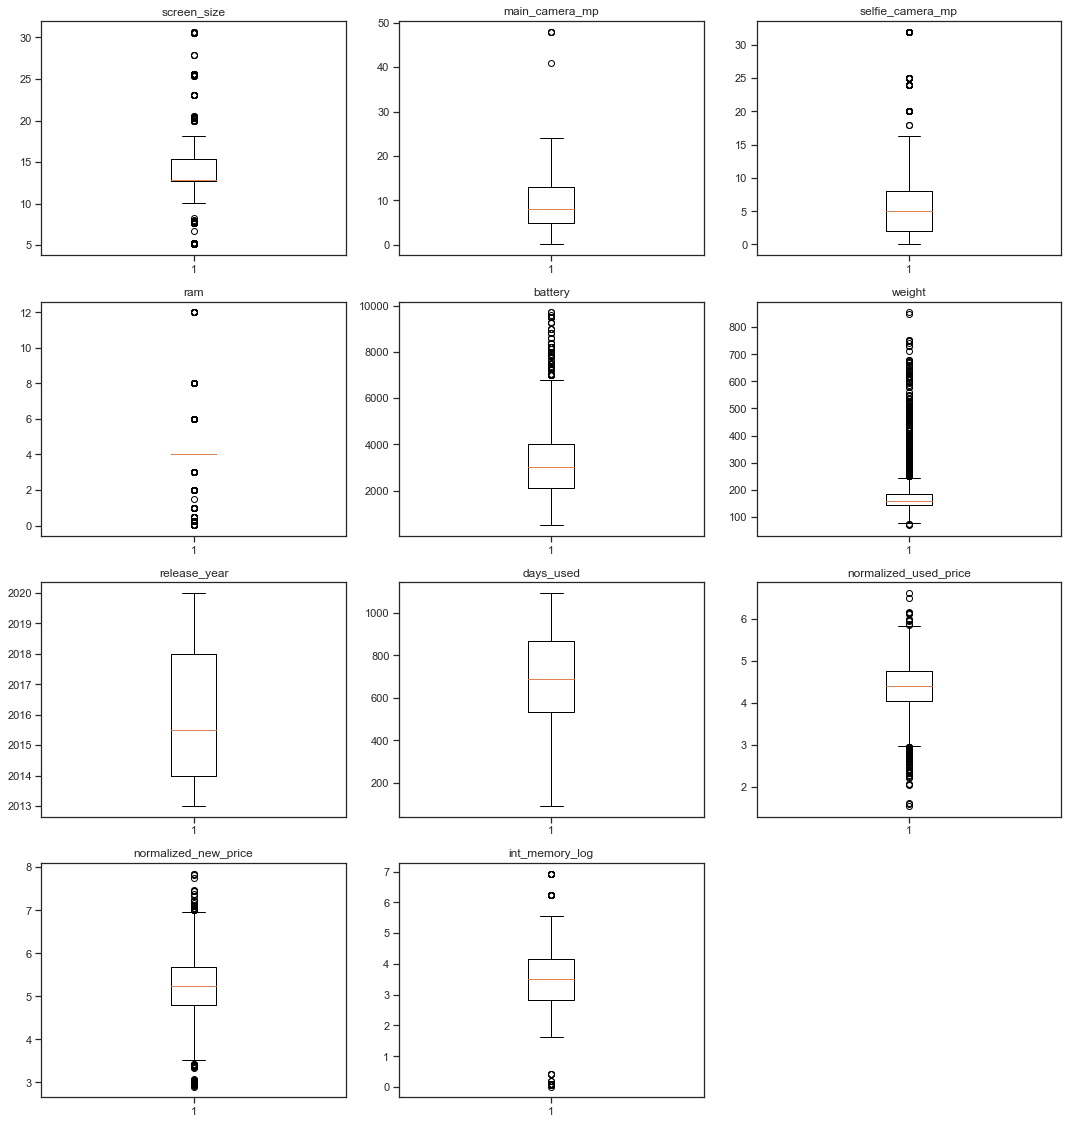

<IPython.core.display.Javascript object>

In [119]:
num_var = df.select_dtypes(include=np.number).columns.tolist()
# create a boxplot of all the numeric columns
plt.figure(figsize=(15, 35))
for i, variable in enumerate(num_var):
    plt.subplot(9, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)


plt.show()

#### Observations
* Many columns have outliers.
* Battery and weight have several outliers on the high end of the distribution.
* Outliers contribute significantly to the variation in the ram data.

In [120]:
# make a copy of df for outlier treatment
df1 = df.copy()

<IPython.core.display.Javascript object>

In [121]:
# This function identifies the number of high and low "extreme" outliers defined as Q1-3*IQR & Q3+3*IQR
def identify_outliers(df, col):
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Extreme_Lower = Q1 - 3 * IQR
    Extreme_Upper = Q3 + 3 * IQR
    target_outliers_low = df[df[col] < Extreme_Lower]
    target_outliers_high = df[df[col] > Extreme_Upper]
    print(
        f"There are {target_outliers_low.shape[0]} extreme low outliers and {target_outliers_high.shape[0]} extreme high outliers in the {col} column."
    )  # f-string)


def identify_outliers_all(df, col_list):
    for c in col_list:
        identify_outliers(df, c)

<IPython.core.display.Javascript object>

In [122]:
# find how many extreme outliers (3*IQR) are present in each of the numeric columns
identify_outliers_all(df1, num_var)

There are 0 extreme low outliers and 120 extreme high outliers in the screen_size column.
There are 0 extreme low outliers and 5 extreme high outliers in the main_camera_mp column.
There are 0 extreme low outliers and 94 extreme high outliers in the selfie_camera_mp column.
There are 333 extreme low outliers and 302 extreme high outliers in the ram column.
There are 0 extreme low outliers and 2 extreme high outliers in the battery column.
There are 0 extreme low outliers and 253 extreme high outliers in the weight column.
There are 0 extreme low outliers and 0 extreme high outliers in the release_year column.
There are 0 extreme low outliers and 0 extreme high outliers in the days_used column.
There are 3 extreme low outliers and 0 extreme high outliers in the normalized_used_price column.
There are 0 extreme low outliers and 0 extreme high outliers in the normalized_new_price column.
There are 0 extreme low outliers and 0 extreme high outliers in the int_memory_log column.


<IPython.core.display.Javascript object>

### In order to retain maximum data, a conservative outlier removal approach will be taken
* "Extreme low" is defined as $Q1-3*IQR$.
* "Extreme high" is defined as $Q3+3*IQR$.
* For target variable, removing outliers below extreme low (there are 3) & above extreme high (there are none).
* For predictor variables (other than ram), imputing outliers below of extreme low with value at extreme low & outliers outside of extreme high with value at extreme high.

In [123]:
# number of rows & columns before dropping rows with target outliers
df1.shape

(3454, 15)

<IPython.core.display.Javascript object>

In [124]:
Q1 = df["normalized_used_price"].quantile(0.25)  # 25th quantile
Q3 = df["normalized_used_price"].quantile(0.75)  # 75th quantile
IQR = Q3 - Q1
Extreme_Lower = Q1 - 3 * IQR

# drop the rows containing normalized_used_price outliers
df1.drop(df1[df1["normalized_used_price"] < Extreme_Lower].index, inplace=True)

<IPython.core.display.Javascript object>

In [125]:
# number of rows & columns after dropping rows with target outliers
df1.shape

(3451, 15)

<IPython.core.display.Javascript object>

In [126]:
# functions to treat "extreme" outliers by flooring and capping
def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Extreme_Lower = Q1 - 3 * IQR
    Extreme_Upper = Q3 + 3 * IQR

    # all the values smaller than Extreme_Lower will be assigned the value of Extreme_Lower
    # all the values greater than Extreme_Upper will be assigned the value of Extreme_Upper
    df[col] = np.clip(df[col], Extreme_Lower, Extreme_Upper)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [127]:
# all predictor columns that contain extreme outliers except for ram
treat_out_cols = [
    "screen_size",
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

df2 = treat_outliers_all(df1, treat_out_cols)

<IPython.core.display.Javascript object>

### EDA

### Boxplots of numeric columns after outlier treatment

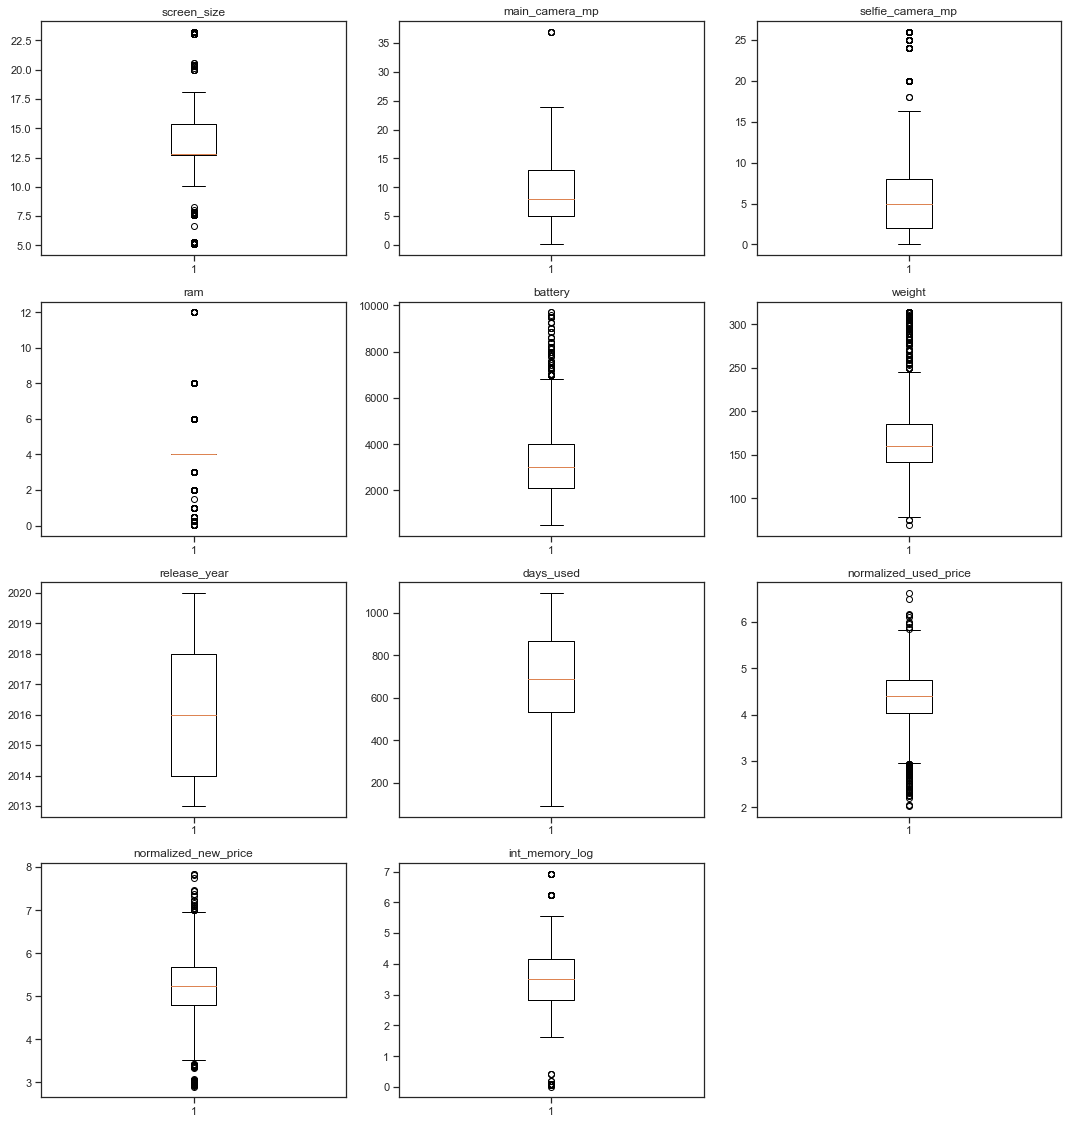

<IPython.core.display.Javascript object>

In [128]:
# create a boxplot of all the numeric columns
plt.figure(figsize=(15, 35))
for i, variable in enumerate(num_var):
    plt.subplot(9, 3, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)


plt.show()

## Building a Linear Regression model

In [129]:
# define dependent variable
X = df2.drop(["normalized_used_price", "brand_name"], axis=1)
y = df2["normalized_used_price"]

<IPython.core.display.Javascript object>

In [130]:
# let's add the intercept to data
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [131]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# to ensure all variables are of float type
X = X.astype(float)

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,ram,battery,weight,release_year,days_used,normalized_new_price,int_memory_log,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,3.0,3020.0,146.0,2020.0,127.0,4.715100,4.174387,0.0,0.0,0.0,1.0,0.0
1,1.0,17.30,13.0,16.0,8.0,4300.0,213.0,2020.0,325.0,5.519018,4.859812,0.0,0.0,0.0,1.0,1.0
2,1.0,16.69,13.0,8.0,8.0,4200.0,213.0,2020.0,162.0,5.884631,4.859812,0.0,0.0,0.0,1.0,1.0
3,1.0,23.26,13.0,8.0,6.0,7250.0,314.0,2020.0,345.0,5.630961,4.174387,0.0,0.0,0.0,1.0,1.0
4,1.0,15.32,13.0,8.0,3.0,5000.0,185.0,2020.0,293.0,4.947837,4.174387,0.0,0.0,0.0,1.0,0.0


<IPython.core.display.Javascript object>

In [132]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [133]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2415
Number of rows in test data = 1036


<IPython.core.display.Javascript object>

In [134]:
# fitting a linear model
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.844
Model:                               OLS   Adj. R-squared:                  0.843
Method:                    Least Squares   F-statistic:                     868.3
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           15:27:00   Log-Likelihood:                 129.75
No. Observations:                   2415   AIC:                            -227.5
Df Residuals:                       2399   BIC:                            -134.9
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

### Observations 
*  The value for adj. R-squared is **0.843**
* Since adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, this could be considered a good fit.
* The const coefficient (y-intercept) is **-50.77**
* The predictor variable with the largest coeffiecient is normalized_new_price, with a coefficient of **0.42**.

## Model performance evaluation

* Using metric functions defined in sklearn for RMSE, MAE, and $R^2$.

* Using user defined functions to calculate adjusted $R^2$ and MAPE.

In [135]:
# Checking model performance on train set
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229313,0.178928,0.844464,0.843427,4.258801


<IPython.core.display.Javascript object>

In [136]:
# Checking model performance on test set
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23117,0.182053,0.844908,0.842473,4.3948


<IPython.core.display.Javascript object>

**Observations**

- The training $R^2$ is 0.84, so the model is not underfitting.

- The train and test RMSE and MAE are comparable, so the model is not overfitting either.

- MAE suggests that the model can predict normalized_used_price within a mean error of 0.18 euros on the test data.

- MAPE of 4.4 on the test data means that we are able to predict within 4.4% of the normalized_used_price.

## Checking Linear Regression Assumptions

Checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

#### Testing for no Multicollinearity

In [137]:
checking_vif(x_train)

,feature,VIF
0,const,3.557325e+06
1,screen_size,6.552129e+00
2,main_camera_mp,1.961786e+00
3,selfie_camera_mp,2.924881e+00
4,ram,2.074678e+00
5,battery,3.796756e+00
6,weight,4.644513e+00
7,release_year,4.624647e+00
8,days_used,2.519411e+00
9,normalized_new_price,2.738151e+00


<IPython.core.display.Javascript object>

#### Observations
* screen_size has VIF value greater than 5.

### Removing Multicollinearity

In [138]:
col_to_drop = "screen_size"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,3.507147e+06
1,main_camera_mp,1.961726e+00
2,selfie_camera_mp,2.918526e+00
3,ram,2.074245e+00
4,battery,3.215773e+00
5,weight,2.608228e+00
6,release_year,4.557722e+00
7,days_used,2.515854e+00
8,normalized_new_price,2.706874e+00
9,int_memory_log,1.644689e+00


<IPython.core.display.Javascript object>

#### Observations
* The VIF for all variables is less than 5.

In [139]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     899.8
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           15:27:23   Log-Likelihood:                 95.361
No. Observations:                   2415   AIC:                            -160.7
Df Residuals:                       2400   BIC:                            -73.88
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

#### Observations
* Screen size is no longer a predictor variable in the model.
* The adjusted $R^2$ has changed slightly from 0.843 to 0.839.

### p values > 0.05

In [140]:
# initial list of columns
cols = x_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train2[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'battery', 'weight', 'release_year', 'days_used', 'normalized_new_price', 'os_Others']


<IPython.core.display.Javascript object>

In [141]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

<IPython.core.display.Javascript object>

In [142]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     1397.
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           15:27:33   Log-Likelihood:                 91.063
No. Observations:                   2415   AIC:                            -162.1
Df Residuals:                       2405   BIC:                            -104.2
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

**Now no feature has p-value greater than 0.05**

**Observations**

* Now adjusted $R^2$ is 0.839, i.e., the model is able to explain ~84% of the variance. This shows that the model is good.
* The adjusted $R^2$ in *olsmod0* (where we considered all the variables except brand name) was 0.843. This shows that the variables that were dropped were not affecting the model much.

**Remaining assumptions to check on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

In [143]:
# dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
1128,4.315353,4.315115,0.000237
1522,4.138521,4.238495,-0.099974
2908,3.795489,3.932821,-0.137331
103,3.043570,3.340259,-0.296689
1401,3.958334,4.205550,-0.247216


<IPython.core.display.Javascript object>

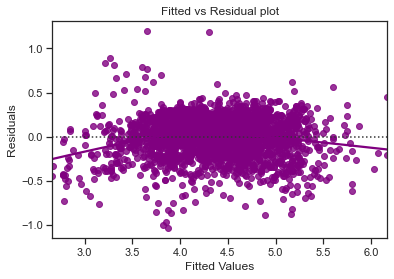

<IPython.core.display.Javascript object>

In [144]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* Since there is minimual pattern in the plot above, the assumptions of linearity and independence are satisfied.

### TEST FOR NORMALITY

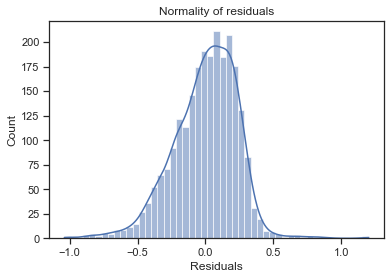

<IPython.core.display.Javascript object>

In [145]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals almost has a bell shape.
- Checking the Q-Q plot below.

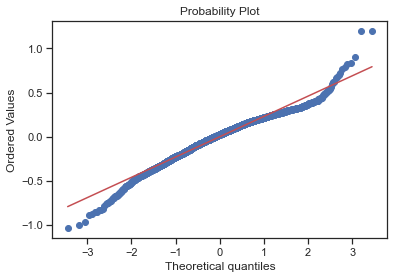

<IPython.core.display.Javascript object>

In [146]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [147]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9736120104789734, pvalue=1.0429898533254818e-20)

<IPython.core.display.Javascript object>

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY

In [148]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0378174262624202), ('p-value', 0.2603969064608677)]

<IPython.core.display.Javascript object>

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

**Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.**

In [149]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
429,3.781687,3.919181
2049,3.559909,3.514244
165,5.064302,4.923897
1535,4.124712,4.367465
40,4.997685,5.390257
1024,4.351567,4.134713
3292,4.522223,4.670542
2493,4.431769,4.592007
1927,2.691243,2.822157
299,4.633952,5.222673


<IPython.core.display.Javascript object>

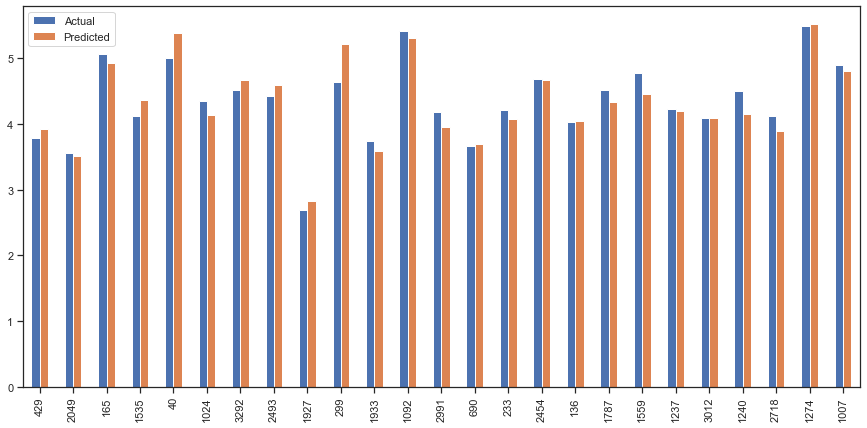

<IPython.core.display.Javascript object>

In [150]:
df3 = df_pred_test.sample(25, random_state=1)
df3.plot(kind="bar", figsize=(15, 7))
plt.show()

In [151]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233017,0.181593,0.8394,0.838732,4.324342


<IPython.core.display.Javascript object>

In [152]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23682,0.186104,0.837235,0.835647,4.497323


<IPython.core.display.Javascript object>

* The model is able to explain ~84% of the variation in the data, which is very good.

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.

* The MAPE on the test set suggests we can predict within 4.5% of the normalized used price. 

* Hence, we can conclude the model *olsmod2* is good for prediction as well as inference purposes.

**Let's compare the initial model created with sklearn and the final statsmodels model.**

In [153]:
# training performance comparison

models_train_comp_df = pd.concat([olsmodel_train_perf.T, olsmod2_train_perf.T], axis=1,)

models_train_comp_df.columns = [
    "Linear Regression (all variables except brand)",
    "Linear Regression (selected variables)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression (all variables except brand),Linear Regression (selected variables)
RMSE,0.229313,0.233017
MAE,0.178928,0.181593
R-squared,0.844464,0.839400
Adj. R-squared,0.843427,0.838732
MAPE,4.258801,4.324342


<IPython.core.display.Javascript object>

In [154]:
# test performance comparison

models_test_comp_df = pd.concat([olsmodel_test_perf.T, olsmod2_test_perf.T], axis=1,)

models_test_comp_df.columns = [
    "Linear Regression (all variables except brand)",
    "Linear Regression (selected variables)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression (all variables except brand),Linear Regression (selected variables)
RMSE,0.231170,0.236820
MAE,0.182053,0.186104
R-squared,0.844908,0.837235
Adj. R-squared,0.842473,0.835647
MAPE,4.394800,4.497323


<IPython.core.display.Javascript object>

In [155]:
olsmodel_final = sm.OLS(y_train, x_train3).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     1397.
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           15:28:28   Log-Likelihood:                 91.063
No. Observations:                   2415   AIC:                            -162.1
Df Residuals:                       2405   BIC:                            -104.2
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

In [156]:
# Automate the equation of fit
# Let us write the equation of linear regression
Equation = "Predicted normalized_used_price ="
print(Equation, end=" ")
for i in range(len(x_train3.columns)):
    if i == 0:
        print(model.params[i], "+", end=" ")
    elif i != len(x_train3.columns) - 1:
        print(
            "(", model.params[i], ")*(", x_train3.columns[i], ")", "+", end=" ",
        )
    else:
        print("(", model.params[i], ")*(", x_train3.columns[i], ")")

Predicted normalized_used_price = -64.76156549599342 + ( 0.021071236875244606 )*( main_camera_mp ) + ( 0.01551579411518498 )*( selfie_camera_mp ) + ( 0.019460690128826105 )*( ram ) + ( 2.613197839816072e-05 )*( battery ) + ( 0.0022996908756306904 )*( weight ) + ( 0.03273456043387575 )*( release_year ) + ( 6.209378501988857e-05 )*( days_used ) + ( 0.42874700414440925 )*( normalized_new_price ) + ( -0.07222558688850896 )*( os_Others )


<IPython.core.display.Javascript object>

## Actionable Insights and Recommendations

- The final model consists of a constant and 9 predictor variables.

- The final model shows normalized new price to be very significant as a predictor of used price. As normalized new price increases, the predicted normalized used price increases as well. 

- Even with different levels of data preprocessing, the strongest predictor of the used device was consistently the price of the new device for every model produced. 

- Predictor variables with smaller model coefficients changed depending on data preprocessing.

- In this model, predictors other than price of the new device are selfie_camera_mp, main_camera_mp, ram, battery, weight, release_year, days_used, and os_Others.

- os_Others has a negative coefficient indicating that if the operating system is not Android, Windows, or iOS, the normalized_used_price of the device will decrease. 

- In order to achieve better fitting models, it could be helpful to split the data into different device types (separate phone data from tablet data) and create a model to predict the normalized_used_price of each device type.